# <center> **Content**

1. Data Preparation
   * Collect and preprocess triples (SOA, YAGO)
   * Build seed alignments
   * Ceate train / validation / test splits for alignment tasks

2. Embedding Models 
   * Train KGE models (TransE, ComplEx, DistMult, RotatE, SimplE) using PyKEEN
   * Evaluate embeddings with MRR and Hits@K
   * Visualize learned spaces (t-SNE / PCA projections)

3. Alignment-Specific Models
   * MTransE
   * Graph Neural Network (GCN)
   * BERT-INT

4. Evaluation and graph export
   * Compare model performance across tracks (concepts, institutions, authors)
   * Merge aligned entities and export graphs
   
5. Future Roadmap
   * Extend to new entity types
   * Integrate into a unified KG for link prediction and graph completion
   * Export to RDF/Turtle and enable SPARQL querying via RDFLib


# <center>**SPARQL queries for the endpoints to extract the data:**
## <center>SemOpenAlex (https://semopenalex.org/sparql)

1. Author–Work edges → save as: **soa_edges_author_work.csv**

```
PREFIX dcterms: <http://purl.org/dc/terms/>
SELECT DISTINCT ?author ?work
WHERE {
  ?work dcterms:creator ?author .
}
LIMIT 100000
```

2. Concepts + Wikidata QID → save as: **soa_concepts_qid.csv**
```
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
SELECT DISTINCT ?concept ?qid
WHERE {
  ?concept a skos:Concept ; ?p ?wd .
  FILTER(CONTAINS(STR(?wd), "wikidata.org/entity/Q"))
  BIND(REPLACE(STR(?wd), ".*/entity/", "") AS ?qid)
}
LIMIT 100000
```
3. Works + MAG ID → save as: **soa_works_magid.csv**
```
PREFIX dcterms: <http://purl.org/dc/terms/>
SELECT DISTINCT ?work ?magId ?created ?modified
WHERE {
  ?work a <https://semopenalex.org/ontology/Work> ;
        <https://semopenalex.org/ontology/magId> ?magId ;
        dcterms:created ?created ;
        dcterms:modified ?modified .
}
LIMIT 100000
```
4. Works + DOI → save as: **soa_works_doi.csv**
```
PREFIX datacite: <http://purl.org/spar/datacite/>
SELECT DISTINCT ?work ?doi
WHERE {
  ?work a <https://semopenalex.org/ontology/Work> ;
        datacite:doi ?doi .
}
LIMIT 100000
```
5. Works + Title (useful) → save as: **soa_works_title.csv**
```
PREFIX dcterms: <http://purl.org/dc/terms/>
SELECT DISTINCT ?work ?title
WHERE {
  ?work a <https://semopenalex.org/ontology/Work> ;
        dcterms:title ?title .
}
LIMIT 100000
```
6. Institutions + ROR → save as: **soa_institutions_ror.csv**
```
SELECT DISTINCT ?inst ?ror
WHERE {
  ?inst a <https://semopenalex.org/ontology/Institution> ;
        <https://semopenalex.org/ontology/ror> ?ror .
}
LIMIT 100000
```
7. Authors + ORCID → save as: **soa_authors_orcid.csv**
```
SELECT DISTINCT ?author ?orcid
WHERE {
  ?author a <https://semopenalex.org/ontology/Author> ;
          <https://dbpedia.org/ontology/orcidId> ?orcid .
}
LIMIT 100000
```
---
---
## <center>YAGO (https://yago-knowledge.org/sparql) </br>
1. Works + QID → save as: **yago_works_qid.csv**
```
PREFIX schema: <http://schema.org/>
PREFIX owl:    <http://www.w3.org/2002/07/owl#>
SELECT DISTINCT ?yagoWork ?qid
WHERE {
  ?yagoWork a schema:CreativeWork ; owl:sameAs ?wd .
  FILTER(CONTAINS(STR(?wd), "wikidata.org/entity/Q"))
  BIND(STRAFTER(STR(?wd), "entity/") AS ?qid)
}
LIMIT 100000
```
2. Authors + QID → save as: **yago_authors_qid.csv**
```
PREFIX schema: <http://schema.org/>
PREFIX owl:    <http://www.w3.org/2002/07/owl#>
SELECT DISTINCT ?yagoAuthor ?qid
WHERE {
  ?yagoAuthor a schema:Person ; owl:sameAs ?wd .
  FILTER(CONTAINS(STR(?wd), "wikidata.org/entity/Q"))
  BIND(STRAFTER(STR(?wd), "entity/") AS ?qid)
}
LIMIT 100000
```
3. Institutions + QID → save as: **yago_institutions_qid.csv**
```
PREFIX schema: <http://schema.org/>
PREFIX owl:    <http://www.w3.org/2002/07/owl#>
SELECT DISTINCT ?yagoOrg ?qid
WHERE {
  ?yagoOrg a schema:Organization ; owl:sameAs ?wd .
  FILTER(CONTAINS(STR(?wd), "wikidata.org/entity/Q"))
  BIND(STRAFTER(STR(?wd), "entity/") AS ?qid)
}
LIMIT 100000
```
4. Concepts + QID → save as: **yago_concepts_qid.csv**
```
PREFIX owl: <http://www.w3.org/2002/07/owl#>
SELECT DISTINCT ?yagoConcept ?qid
WHERE {
  ?yagoConcept owl:sameAs ?wd .
  FILTER(CONTAINS(STR(?wd), "wikidata.org/entity/Q"))
  BIND(STRAFTER(STR(?wd), "entity/") AS ?qid)
}
LIMIT 100000
```
5. Entities + QID → save as: **yago_entities_qid.csv**  
*(Here, I reproduced multiple files with the the help of:<br>
   LIMIT 100000 OFFSET 0 <br>
   LIMIT 100000 OFFSET 100000 .. <br>i did this 5 times which can be seen later in merging of these datasets)*
```
PREFIX owl: <http://www.w3.org/2002/07/owl#>
SELECT DISTINCT ?yagoEntity ?qid
WHERE {
  ?yagoEntity owl:sameAs ?wd .
  FILTER(STRSTARTS(STR(?wd), "http://www.wikidata.org/entity/Q") ||
         STRSTARTS(STR(?wd), "https://www.wikidata.org/entity/Q"))
  BIND(STRAFTER(STR(?wd), "entity/") AS ?qid)
}
LIMIT 100000
```
---
---
## <center> Wikidata (https://query.wikidata.org/)

1. Works (DOI → QID) Save as **wd_works_doi.csv**
```
SELECT ?item ?doi
WHERE {
  ?item wdt:P356 ?doi .   # DOI
}
```

2. Authors (ORCID → QID) Save as **wd_authors_orcid.csv**
```
SELECT ?item ?orcid
WHERE {
  ?item wdt:P496 ?orcid .   # ORCID iD
}
```
3. Institutions (ROR → QID) Save as **wd_institutions_ror.csv**
```
SELECT ?item ?ror
WHERE {
  ?item wdt:P6782 ?ror .   # ROR ID
}
```

# **Implementation**

In [ ]:
!pip -q install --upgrade pip
!pip -q install pandas requests tqdm
!pip -q install git+https://github.com/pykeen/pykeen.git
!pip -q install torch --upgrade
!pip -q install torch torchvision --index-url https://download.pytorch.org/whl/cu128  # we install this library for using GPU power for faster learning.
!pip -q install pyvis
!pip -q install seaborn
!pip -q install transformers accelerate

In [13]:
# === Core Python & Utilities ===
import os, re, time, math, json, textwrap, itertools, random, webbrowser
from collections import Counter
from tqdm import tqdm

# === Data & Math ===
import numpy as np
import pandas as pd

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# === Machine Learning & Similarity ===
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# === Deep Learning ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# === Knowledge Graph Embeddings ===
import pykeen
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

# === Graphs & Visualization ===
import networkx as nx
from pyvis.network import Network

# === Transformers ===
from transformers import AutoTokenizer, AutoModel

In [8]:
BASE = 'Extracted data'
ALIGN_DIR = os.path.join(BASE, 'alignments')
os.makedirs(ALIGN_DIR, exist_ok=True)

def load_csv(name):
    """Load CSV and normalize headers (drops Unnamed cols, strips quotes, lowercases)."""
    p = os.path.join(BASE, name)
    df = pd.read_csv(p)
    # Drop index leftovers like 'Unnamed: 0'
    df = df.loc[:, ~df.columns.str.contains('^unnamed', case=False)]
    # Normalize headers: trim, remove quotes, lowercase, keep last path segment after '/'
    df.columns = [c.strip().strip('"').lower().split('/')[-1] for c in df.columns]
    # Drop duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]
    for col in df.columns:
        df[col] = df[col].map(
            lambda x: str(x).replace('"', '').strip() if pd.notna(x) else x
        )
    return df

# **Loading Data**
In this first step, we load the core slices of data from each knowledge graph that we’ll later try to align. Each file is a pre-extracted CSV from one of the three sources: **SemOpenAlex (SOA), YAGO, and Wikidata (WD).** For now, We’re focusing on four main entity types for integration across the graphs: *works, authors, institutions, concepts*.

In [4]:
# List downloaded parts for merging into a big CSV
# I have multiple shard files from the same YAGO extraction.
parts = [
    'yago_entities_qid_part1.csv',
    'yago_entities_qid_part2.csv',
    'yago_entities_qid_part3.csv',
    'yago_entities_qid_part4.csv',
    'yago_entities_qid_part5.csv',
]

dfs = []
for fname in parts:
    df = pd.read_csv(os.path.join(BASE, fname))
    dfs.append(df)

# Concatenate & drop duplicates
merged = pd.concat(dfs, ignore_index=True).drop_duplicates()
merged.to_csv(os.path.join(BASE, 'yago_entities_qid.csv'), index=False)

# Now, we need all SemOpenAlex, YAGO, and Wikidata slices so later we can align via shared identifiers.

# SemOpenAlex data
soa_edges_author_work   = load_csv('soa_edges_author_work.csv')     # cols: author, work
soa_concepts_qid        = load_csv('soa_concepts_qid.csv')          # cols: concept, qid
soa_works_magid         = load_csv('soa_works_magid.csv')           # cols: work, magid, created, modified
soa_works_doi           = load_csv('soa_works_doi.csv')             # cols: work, doi
soa_works_title         = load_csv('soa_works_title.csv')           # optional: work, title
soa_institutions_ror    = load_csv('soa_institutions_ror.csv')      # cols: inst, ror
soa_authors_orcid       = load_csv('soa_authors_orcid.csv')         # cols: author, orcid

# YAGO data
yago_works_qid          = load_csv('yago_works_qid.csv')            # cols: yagowork, qid
yago_authors_qid        = load_csv('yago_authors_qid.csv')          # cols: yagoauthor, qid
yago_institutions_qid   = load_csv('yago_institutions_qid.csv')     # cols: yagoorg, qid
yago_concepts_qid       = load_csv('yago_concepts_qid.csv')         # cols: yagoconcept, qid
yago_entities_qid       = load_csv('yago_entities_qid.csv')         # cols: yagoEntity, qid

# Wikidata data
wd_authors_orcid     = load_csv('wd_authors_orcid.csv')     # cols: item, orcid
wd_institutions_ror  = load_csv('wd_institutions_ror.csv')  # cols: item, ror
wd_works_doi         = load_csv('wd_works_doi.csv')         # cols: item, doi

# Rename to ensure correct schema (guarantees column names are standard)
if 'qid' not in yago_entities_qid.columns:
    qcol = [c for c in yago_entities_qid.columns if 'qid' in c][0]
    yago_entities_qid.rename(columns={qcol:'qid'}, inplace=True)

if 'yagoentity' not in yago_entities_qid.columns:
    ent_col = [c for c in yago_entities_qid.columns if c != 'qid'][0]
    yago_entities_qid.rename(columns={ent_col:'yagoentity'}, inplace=True)

# Display dataframe information and head for visualization
pd.set_option('display.max_colwidth', None)

print("--- SemOpenAlex DataFrames ---")
print(f"soa_edges_author_work: {soa_edges_author_work.shape[0]:,} rows × {soa_edges_author_work.shape[1]:,} cols")
display(soa_edges_author_work.head())
print(f"soa_concepts_qid: {soa_concepts_qid.shape[0]:,} rows × {soa_concepts_qid.shape[1]:,} cols")
display(soa_concepts_qid.head())
print(f"soa_works_magid: {soa_works_magid.shape[0]:,} rows × {soa_works_magid.shape[1]:,} cols")
display(soa_works_magid.head())
print(f"soa_works_doi: {soa_works_doi.shape[0]:,} rows × {soa_works_doi.shape[1]:,} cols")
display(soa_works_doi.head())
print(f"soa_works_title: {soa_works_title.shape[0]:,} rows × {soa_works_title.shape[1]:,} cols")
display(soa_works_title.head())
print(f"soa_institutions_ror: {soa_institutions_ror.shape[0]:,} rows × {soa_institutions_ror.shape[1]:,} cols")
display(soa_institutions_ror.head())
print(f"soa_authors_orcid: {soa_authors_orcid.shape[0]:,} rows × {soa_authors_orcid.shape[1]:,} cols")
display(soa_authors_orcid.head())

print("\n--- YAGO DataFrames ---")
print(f"yago_works_qid: {yago_works_qid.shape[0]:,} rows × {yago_works_qid.shape[1]:,} cols")
display(yago_works_qid.head())
print(f"yago_authors_qid: {yago_authors_qid.shape[0]:,} rows × {yago_authors_qid.shape[1]:,} cols")
display(yago_authors_qid.head())
print(f"yago_institutions_qid: {yago_institutions_qid.shape[0]:,} rows × {yago_institutions_qid.shape[1]:,} cols")
display(yago_institutions_qid.head())
print(f"yago_concepts_qid: {yago_concepts_qid.shape[0]:,} rows × {yago_concepts_qid.shape[1]:,} cols")
display(yago_concepts_qid.head())
print(f"yago_entities_qid: {yago_entities_qid.shape[0]:,} rows × {yago_entities_qid.shape[1]:,} cols")
display(yago_entities_qid.head())

print("\n--- Wikidata DataFrames ---")
print(f"wd_authors_orcid: {wd_authors_orcid.shape[0]:,} rows × {wd_authors_orcid.shape[1]:,} cols")
display(wd_authors_orcid.head())
print(f"wd_institutions_ror: {wd_institutions_ror.shape[0]:,} rows × {wd_institutions_ror.shape[1]:,} cols")
display(wd_institutions_ror.head())
print(f"wd_works_doi: {wd_works_doi.shape[0]:,} rows × {wd_works_doi.shape[1]:,} cols")
display(wd_works_doi.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21676\102191122.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(p)


--- SemOpenAlex DataFrames ---
soa_edges_author_work: 100,000 rows × 2 cols


,author,work
0,http://dbpedia.org/resource/Karlsruhe_Institute_of_Technology,https://w3id.org/SemOpenAlex
1,http://www.wikidata.org/entity/Q158158,https://w3id.org/SemOpenAlex
2,http://www.wikidata.org/entity/Q22132500,https://w3id.org/SemOpenAlex
3,https://semopenalex.org/author/A5077419673,https://semopenalex.org/work/W173968082
4,https://semopenalex.org/author/A5112217441,https://semopenalex.org/work/W173968082


soa_concepts_qid: 33,147 rows × 2 cols


,concept,qid
0,https://semopenalex.org/concept/C100253034,Q196372
1,https://semopenalex.org/concept/C105795698,Q12483
2,https://semopenalex.org/concept/C33923547,Q395
3,https://semopenalex.org/concept/C100631289,Q898362
4,https://semopenalex.org/concept/C121332964,Q413


soa_works_magid: 82,231 rows × 4 cols


,work,magid,created,modified
0,https://semopenalex.org/work/W173968082,173968082,2016-06-24,2024-12-14
1,https://semopenalex.org/work/W30906691,30906691,2016-06-24,2024-12-14
2,https://semopenalex.org/work/W3093432896,3093432896,2020-10-22,2025-01-25
3,https://semopenalex.org/work/W328360609,328360609,2016-06-24,2025-01-25
4,https://semopenalex.org/work/W331153779,331153779,2016-06-24,2025-01-20


soa_works_doi: 100,000 rows × 2 cols


,work,doi
0,https://semopenalex.org/work/W3093432896,https://doi.org/10.36315/education-and-new-developments_2019_vol_i.pdf
1,https://semopenalex.org/work/W328360609,https://doi.org/10.2307/1320422
2,https://semopenalex.org/work/W2615901470,https://doi.org/10.1016/j.jsv.2017.05.028
3,https://semopenalex.org/work/W2751162600,https://doi.org/10.1016/j.strusafe.2017.07.005
4,https://semopenalex.org/work/W2890364593,https://doi.org/10.1016/j.enggeo.2018.09.009


soa_works_title: 100,000 rows × 2 cols


,work,title
0,https://semopenalex.org/work/W173968082,The Power of the Arts To Transform Education: An Agenda for Action. Summary.
1,https://semopenalex.org/work/W30906691,Ideas Shaping American Education. Summary.
2,https://semopenalex.org/work/W3093432896,Education and New Developments 2019
3,https://semopenalex.org/work/W328360609,Contemporary Reform and the Contents of Curricula
4,https://semopenalex.org/work/W331153779,Science Education for the Nonscientist.


soa_institutions_ror: 100,000 rows × 2 cols


,inst,ror
0,https://semopenalex.org/institution/I4210089920,https://ror.org/00a0bqh48
1,https://semopenalex.org/institution/I4210139259,https://ror.org/050phcn63
2,https://semopenalex.org/institution/I4210108340,https://ror.org/01rvqzw67
3,https://semopenalex.org/institution/I4210134544,https://ror.org/044s61914
4,https://semopenalex.org/institution/I115498069,https://ror.org/039ygjf22


soa_authors_orcid: 100,000 rows × 2 cols


,author,orcid
0,https://semopenalex.org/author/A5007433041,https://orcid.org/0000-0001-5752-4532
1,https://semopenalex.org/author/A5024847074,https://orcid.org/0000-0003-0519-4900
2,https://semopenalex.org/author/A5064883316,https://orcid.org/0000-0001-5945-2253
3,https://semopenalex.org/author/A5092975050,https://orcid.org/0000-0002-2005-9849
4,https://semopenalex.org/author/A5026525627,https://orcid.org/0009-0001-4233-2041



--- YAGO DataFrames ---
yago_works_qid: 290 rows × 2 cols


,yagowork,qid
0,http://yago-knowledge.org/resource/Quaestiones_quaedam_philosophicae,Q7268454
1,http://yago-knowledge.org/resource/Smile__u0028_magazine_u0029_,Q7544615
2,http://yago-knowledge.org/resource/Starwolf__u0028_novel_series_u0029_,Q7601188
3,http://yago-knowledge.org/resource/The_Lay_of_the_Children_of_Húrin,Q7746463
4,http://yago-knowledge.org/resource/The_Wolf_at_the_Door_u003A__A_Poetic_Cycle,Q7775434


yago_authors_qid: 100,000 rows × 2 cols


,yagoauthor,qid
0,http://yago-knowledge.org/resource/Marcia_Furnilla,Q731059
1,http://yago-knowledge.org/resource/Najwa_Ghanem,Q6960065
2,http://yago-knowledge.org/resource/Sitre,Q299633
3,http://yago-knowledge.org/resource/Suzanne_Elrod,Q29168654
4,http://yago-knowledge.org/resource/Tanedjemet,Q21070437


yago_institutions_qid: 21,483 rows × 2 cols


,yagoorg,qid
0,http://yago-knowledge.org/resource/Italian_society_of_economics_demography_and_statistics,Q281806
1,http://yago-knowledge.org/resource/London_Transport_Board,Q3244480
2,http://yago-knowledge.org/resource/Association_of_International_Collective_Management_of_Audiovisual_Works,Q292315
3,http://yago-knowledge.org/resource/Brazilian_Health_Regulatory_Agency,Q295815
4,http://yago-knowledge.org/resource/Equmenia,Q292300


yago_concepts_qid: 100,000 rows × 2 cols


,yagoconcept,qid
0,http://yago-knowledge.org/resource/Pneumonoultramicroscopicsilicovolcanoconiosis,Q102
1,http://yago-knowledge.org/resource/Supercalifragilisticexpialidocious,Q103
2,http://yago-knowledge.org/resource/Sierra_Leone,Q1044
3,http://yago-knowledge.org/resource/Sudan,Q1049
4,http://yago-knowledge.org/resource/Italo_Balbo,Q1056


yago_entities_qid: 599,993 rows × 2 cols


,yagoentity,qid
0,http://yago-knowledge.org/resource/Pneumonoultramicroscopicsilicovolcanoconiosis,Q102
1,http://yago-knowledge.org/resource/Supercalifragilisticexpialidocious,Q103
2,http://yago-knowledge.org/resource/Sierra_Leone,Q1044
3,http://yago-knowledge.org/resource/Sudan,Q1049
4,http://yago-knowledge.org/resource/Italo_Balbo,Q1056



--- Wikidata DataFrames ---
wd_authors_orcid: 1,933,892 rows × 2 cols


,item,orcid
0,http://www.wikidata.org/entity/Q89063251,0000-0001-5069-3018
1,http://www.wikidata.org/entity/Q63461190,0000-0001-5238-7460
2,http://www.wikidata.org/entity/Q94678290,0000-0001-5462-0086
3,http://www.wikidata.org/entity/Q42777811,0000-0001-5514-6021
4,http://www.wikidata.org/entity/Q91509056,0000-0001-5564-9788


wd_institutions_ror: 118,024 rows × 2 cols


,item,ror
0,http://www.wikidata.org/entity/Q1499019,04tjfqn96
1,http://www.wikidata.org/entity/Q470438,05r3f7h03
2,http://www.wikidata.org/entity/Q20646894,05rx18c05
3,http://www.wikidata.org/entity/Q134251088,008wzj148
4,http://www.wikidata.org/entity/Q111522228,010pb5v16


wd_works_doi: 320,849 rows × 2 cols


,item,doi
0,http://www.wikidata.org/entity/Q103883147,10.1093/ANB/9780198606697.ARTICLE.0401011
1,http://www.wikidata.org/entity/Q103879206,10.1093/ANB/9780198606697.ARTICLE.0401086
2,http://www.wikidata.org/entity/Q103868227,10.1093/ANB/9780198606697.ARTICLE.0600381
3,http://www.wikidata.org/entity/Q103856965,10.1093/ANB/9780198606697.ARTICLE.0800454
4,http://www.wikidata.org/entity/Q103878518,10.1093/ANB/9780198606697.ARTICLE.0801335


# **Normalizers**
Why normalization matters here?

SemOpenAlex, YAGO, and Wikidata don’t hand you identifiers in the exact same string format. Even if they refer to the same real-world entity, the raw strings can look different.

| Source        | Example raw value                             |
| ------------- | --------------------------------------------- |
| SOA DOI       | `https://doi.org/10.1038/s41586-019-1234-5`   |
| WD DOI        | `10.1038/S41586-019-1234-5` (case difference) |
| YAGO QID link | `"Q12345"`                                    |
| SOA ORCID     | `https://orcid.org/0000-0002-1825-0097`       |
| WD ORCID      | `0000-0002-1825-0097`                         |

<br>
So, normalization makes all of those strings consistent.

* DOIs → 10.1038/s41586-019-1234-5
* ORCIDs → 0000-0002-1825-0097
* QIDs → Q12345
* RORs → https://ror.org/05dxps055

In [7]:
r'''
Extracts a clean Wikidata ID like Q12345 in uppercase.
QIDs may come wrapped in URLs (.../Q12345), quoted ("Q12345"),
or lowercased (q12345). The regex pulls the first Q\d+ anywhere
in the string and uppercases it.
'''
def norm_qid(x):
    if x is None or (isinstance(x, float) and pd.isna(x)): return None
    s = str(x).strip().strip('"').strip("'")
    m = re.search(r'Q\d+', s, flags=re.IGNORECASE)
    return m.group(0).upper() if m else None

'''
Return the bare DOI in lowercase, e.g. 10.1038/s41586-019-1234-5.
DOIs often appear as URLs (https://doi.org/... or http://dx.doi.org/...).
Lowercasing avoids case-mismatch joins.
'''
def norm_doi(x):
    if pd.isna(x): return None
    s = str(x).strip().lower()
    s = re.sub(r'^https?://(dx\.)?doi\.org/', '', s)
    return s if re.match(r'^10\.\S+', s) else None

'''
Normalize to canonical dashed ORCID, uppercase last char for X checksum, e.g. 0000-0002-1825-0097.
ORCIDs show up as URLs or plain IDs; this strips the URL and enforces the dashed pattern.
'''
def norm_orcid(x):
    if pd.isna(x): return None
    s = str(x).strip()
    s = re.sub(r'^https?://orcid\.org/', '', s, flags=re.I)
    s = s.upper()
    return s if re.fullmatch(r'\d{4}-\d{4}-\d{4}-\d{3}[\dX]', s) else None

# Normalize qid in SOA & YAGO, and derive qid from WD item. Make sure all QIDs are clean
for df in [soa_concepts_qid, yago_works_qid, yago_authors_qid, yago_institutions_qid, yago_concepts_qid, yago_entities_qid]:
    if 'qid' in df.columns:
        df['qid'] = df['qid'].map(norm_qid)

# Add 'qid' column to WD tables,so you can join by qid later.
for df in [wd_authors_orcid, wd_institutions_ror, wd_works_doi]:
    if 'item' in df.columns:
        df['qid'] = df['item'].map(norm_qid)

# Normalize SOA external IDs
if 'doi' in soa_works_doi.columns:
    soa_works_doi['doi_norm'] = soa_works_doi['doi'].map(norm_doi)
if 'orcid' in soa_authors_orcid.columns:
    soa_authors_orcid['orcid_norm'] = soa_authors_orcid['orcid'].map(norm_orcid)
if 'ror' in soa_institutions_ror.columns:
    soa_institutions_ror['ror_norm'] = soa_institutions_ror['ror'].map(
        lambda x: str(x).strip() if pd.notna(x) else None
    )

# Normalize WD external IDs + ROR
if 'orcid' in wd_authors_orcid.columns:
    wd_authors_orcid['orcid_norm'] = wd_authors_orcid['orcid'].map(norm_orcid)
if 'ror' in wd_institutions_ror.columns: # RORs sometimes appear as bare IDs
    wd_institutions_ror['ror_norm'] = wd_institutions_ror['ror'].map(
        lambda x: f'https://ror.org/{str(x).strip()}' if pd.notna(x) and not str(x).startswith('http') else x
    )
if 'doi' in wd_works_doi.columns:
    wd_works_doi['doi_norm'] = wd_works_doi['doi'].map(norm_doi)

Once everything is normalized, we can do merge (set intersections) across datasets without losing matches due to formatting quirks. This was the preparation for the seed alignment.



# **Seed Alignments**

We’re doing 4 types of alignments:
* **Concepts via QID**
* **Authors via ORCID → QID → YAGO**
* **Institutions via ROR → QID → YAGO**
* **Works via DOI → QID → YAGO**

**Why Wikidata?**

YAGO was designed as a general-purpose knowledge graph, not a scholarly article index. Even though it’s based on Wikidata, it inherits mostly entities (people, orgs, concepts), not the long tail of millions of works/DOIs.

If you try SOA ↔ YAGO directly by DOI, you’ll basically get nothing because YAGO doesn’t index DOIs at scale. SOA gives external IDs: ORCID, ROR, DOI.

Wikidata is needed as a bridge because YAGO, although based on Wikidata, doesn’t include all external ID mappings (ORCID, DOI, ROR).
YAGO entities are identified only by QIDs!

So, we need Wikidata for **authors, institutions, works**, because SOA gives you ORCID/ROR/DOI while YAGO only has QIDs. Wikidata is the only place with the mappings ORCID→QID, ROR→QID, DOI→QID.

In [8]:
'''
Shuffles a DataFrame (for randomness). Splits into train (20%), valid (10%), test (70%).
Writes them as separate CSVs under alignments folder. These splits will be
ground-truth seeds for training / evaluating alignment models.
'''
def write_splits(df: pd.DataFrame, basename: str):
    df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
    n = len(df); n_train = int(0.2*n); n_valid = int(0.1*n)
    train = df.iloc[:n_train]
    valid = df.iloc[n_train:n_train+n_valid]
    test  = df.iloc[n_train+n_valid:]
    train.to_csv(os.path.join(ALIGN_DIR, f'{basename}_train.csv'), index=False)
    valid.to_csv(os.path.join(ALIGN_DIR, f'{basename}_valid.csv'), index=False)
    test.to_csv(os.path.join(ALIGN_DIR, f'{basename}_test.csv'),   index=False)
    print(f'Wrote {basename}: train={len(train)}, valid={len(valid)}, test={len(test)}')

'''Normalize RORs to standard URL form (https://ror.org/xxxx).'''
def to_ror_norm(x):
    if pd.isna(x): return None
    s = str(x).strip().lower().rstrip('/')
    # If already full URL, keep it; else prepend base ROR URL
    return s if s.startswith('http') else f"https://ror.org/{s}"

# Collect all distinct QIDs from YAGO entities to check intersections later
yago_qids_all = set(yago_entities_qid['qid'].dropna().unique())

# ================================
# 1) CONCEPTS via QID
# ================================
soa_concepts_qid = soa_concepts_qid.copy()
# Clean QIDs in SOA side
soa_concepts_qid['qid'] = soa_concepts_qid['qid'].map(norm_qid)

print("SemOpenAlex concept QIDs:", soa_concepts_qid['qid'].notna().sum())
print("YAGO entity QIDs:", len(yago_qids_all))
print("QID intersection:", len(set(soa_concepts_qid['qid'].dropna()) & yago_qids_all))

# Align SOA concepts ↔ YAGO entities by shared QID
concepts_gold = (
    soa_concepts_qid[['concept','qid']].dropna()
    .merge(yago_entities_qid[['yagoentity','qid']].dropna(), on='qid', how='inner')
    .drop_duplicates()
)

print('Concept alignments (pairs):', len(concepts_gold))
concepts_gold = concepts_gold.rename(columns={'yagoentity': 'yagoconcept'})
write_splits(concepts_gold[['concept', 'yagoconcept']], 'concepts_qid')

# ================================
# 2) AUTHORS via ORCID (SOA ORCID → WD ORCID/QID → YAGO by QID)
# ================================
wd_authors_orcid = wd_authors_orcid.copy()
# Ensure WD side has QIDs (normalize from either 'qid' or 'item' column)
wd_authors_orcid['qid'] = wd_authors_orcid.get('qid', wd_authors_orcid['item']).map(norm_qid)
# Normalize ORCID if missing
if 'orcid_norm' not in wd_authors_orcid.columns:
    wd_authors_orcid['orcid_norm'] = wd_authors_orcid['orcid'].map(norm_orcid)

# Build gold alignments: SOA author ↔ WD (by ORCID) ↔ YAGO (by QID)
authors_gold = (
    soa_authors_orcid[['author','orcid_norm']].dropna()
    .merge(wd_authors_orcid[['qid','orcid_norm']].dropna(), on='orcid_norm', how='inner')
    .merge(yago_entities_qid[['yagoentity','qid']].dropna(), on='qid', how='inner')
    .drop_duplicates()
)

print("Author alignments (ORCID):", len(authors_gold))

# keep yago side consistently named
authors_gold = authors_gold.rename(columns={'yagoentity':'yagoauthor'})
write_splits(authors_gold[['author','yagoauthor']], 'authors_orcid')

# ================================
# 3) INSTITUTIONS via ROR (SOA ROR → WD ROR/QID → YAGO by QID)
# ================================
wd_institutions_ror = wd_institutions_ror.copy()
# Normalize QIDs
wd_institutions_ror['qid'] = wd_institutions_ror.get('qid', wd_institutions_ror['item']).map(norm_qid)

# Ensure RORs are normalized on WD side
if 'ror_norm' not in wd_institutions_ror.columns:
    wd_institutions_ror['ror_norm'] = wd_institutions_ror['ror'].map(to_ror_norm)

# Ensure RORs are normalized on SOA side
soa_institutions_ror = soa_institutions_ror.copy()
if 'ror_norm' not in soa_institutions_ror.columns:
    soa_institutions_ror['ror_norm'] = soa_institutions_ror['ror'].map(to_ror_norm)

# Align SOA institutions ↔ WD (by ROR) ↔ YAGO (by QID)
inst_gold = (
    soa_institutions_ror[['inst','ror_norm']].dropna()
    .merge(wd_institutions_ror[['qid','ror_norm']].dropna(), on='ror_norm', how='inner')
    .merge(yago_entities_qid[['yagoentity','qid']].dropna(), on='qid', how='inner')
    .drop_duplicates()
)

print("Institution alignments (ROR):", len(inst_gold))

# inst_gold = inst_gold.rename(columns={'yagoentity':'yagoorg'})  OVE 2 linije su bile umjesto donje 2
# write_splits(inst_gold[['inst','qid']], 'institutions_qid')
inst_gold = inst_gold.rename(columns={'yagoentity':'yagoorg'})
write_splits(inst_gold[['inst','yagoorg']], 'institutions_qid')

# ================================
# 4) WORKS via DOI (SOA DOI → WD DOI/QID → YAGO by QID)
# ================================
# Normalize SOA DOIs
soa = soa_works_doi[['work', 'doi']].dropna().copy()
soa['doi_norm'] = soa['doi'].map(norm_doi)

# Prepare WD works (normalize QID + DOI)
wd = wd_works_doi[['doi'] + [c for c in wd_works_doi.columns if c in ('qid', 'item')]].dropna().copy()
wd['qid'] = wd.get('qid', wd['item']).map(norm_qid)
wd['doi_norm'] = wd['doi'].map(norm_doi)

# First align SOA ↔ WD by DOI
soa_wd = (
    soa[['work', 'doi_norm']]
    .merge(wd[['qid', 'doi_norm']], on='doi_norm')
    .drop_duplicates()
)

# Then align WD ↔ YAGO by QID
wg = (soa_wd.merge(yago_entities_qid[['yagoentity', 'qid']].dropna(), on='qid')
    .drop_duplicates())

print("Works alignments (DOI→QID→YAGO):", len(wg))

if not wg.empty:
    wg = wg.rename(columns={'yagoentity': 'yagowork'})
    write_splits(wg[['work','yagowork']], 'works_doi')

print("\nDone. Splits are under:", ALIGN_DIR)

SemOpenAlex concept QIDs: 33147
YAGO entity QIDs: 599993
QID intersection: 1773
Concept alignments (pairs): 1251
Wrote concepts_qid: train=250, valid=125, test=876
Author alignments (ORCID): 15
Wrote authors_orcid: train=3, valid=1, test=11
Institution alignments (ROR): 858
Wrote institutions_qid: train=171, valid=85, test=602
Works alignments (DOI→QID→YAGO): 0

Done. Splits are under: Extracted data\alignments


Now, let's visualize the seed alignments.

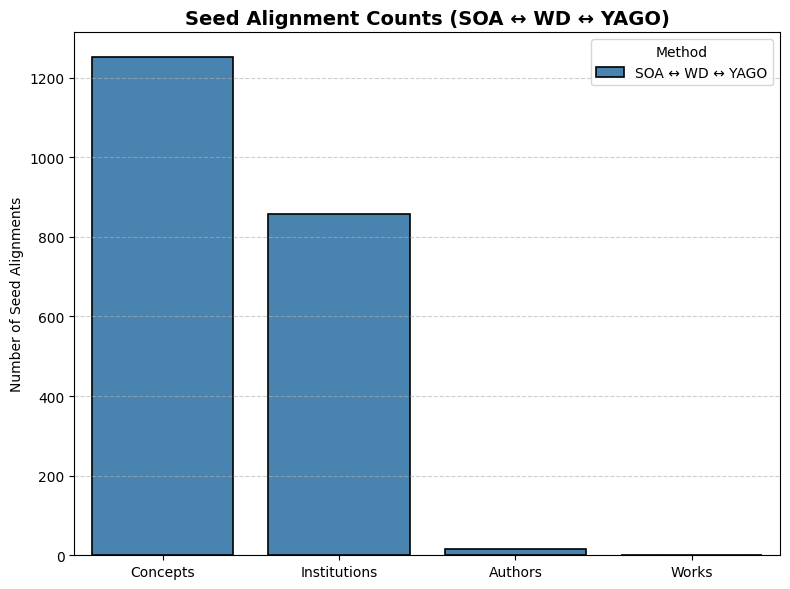

Concept alignments sample:


,concept,qid,yagoconcept
1214,https://semopenalex.org/concept/C153430590,Q184855,http://yago-knowledge.org/resource/Bigeminy
640,https://semopenalex.org/concept/C176661527,Q746935,http://yago-knowledge.org/resource/Reactance__u0028_psychology_u0029_
405,https://semopenalex.org/concept/C2779385521,Q412383,http://yago-knowledge.org/resource/Nitrotyrosine
859,https://semopenalex.org/concept/C2781357019,Q1266395,http://yago-knowledge.org/resource/Duodenal_cancer
318,https://semopenalex.org/concept/C152877465,Q208042,http://yago-knowledge.org/resource/Regression_analysis


Author alignments sample:


,author,orcid_norm,qid,yagoauthor
9,https://semopenalex.org/author/A5103278449,0000-0003-4236-4833,Q370094,http://yago-knowledge.org/resource/Arthur_Jaffe
3,https://semopenalex.org/author/A5052847352,0000-0002-7715-6682,Q1356590,http://yago-knowledge.org/resource/François_Golse
10,https://semopenalex.org/author/A5005980770,0000-0002-3357-3505,Q109559,http://yago-knowledge.org/resource/Thomas_A_u002E__Steitz
2,https://semopenalex.org/author/A5048198842,0000-0002-3418-8449,Q120535,http://yago-knowledge.org/resource/Sami_Solanki
1,https://semopenalex.org/author/A5037571507,0000-0003-2220-1404,Q1107809,http://yago-knowledge.org/resource/Jörg_Vogel


Institution alignments sample:


,inst,ror_norm,qid,yagoorg
410,https://semopenalex.org/institution/I4210161245,https://ror.org/05cf80b72,Q1105163,http://yago-knowledge.org/resource/Cochrane_u002C__Alberta
719,https://semopenalex.org/institution/I2802025772,https://ror.org/000x3c608,Q991772,http://yago-knowledge.org/resource/Bruce_Power
660,https://semopenalex.org/institution/I2800119247,https://ror.org/04jd9ff79,Q1355674,http://yago-knowledge.org/resource/Acoustics_Research_Institute
745,https://semopenalex.org/institution/I4210155177,https://ror.org/05ca9hc42,Q27224,http://yago-knowledge.org/resource/Bentley
633,https://semopenalex.org/institution/I212195252,https://ror.org/00j81st88,Q1053422,http://yago-knowledge.org/resource/Cenovus_Energy


Work alignments sample as we can see, is empty


In [10]:
# Show how many pairs each seed set contains
sizes = {
    "Concepts": len(concepts_gold),
    "Institutions": len(inst_gold),
    "Authors": len(authors_gold),
    "Works": len(wg),
}

df_sizes = pd.DataFrame({
    "Entity Type": list(sizes.keys()),
    "Count": list(sizes.values()),
    "Method": ["SOA ↔ WD ↔ YAGO"] * len(sizes)  # constant hue
})

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_sizes,
    x="Entity Type", y="Count", hue="Method",
    palette="Blues_d", edgecolor="black", linewidth=1.2
)

plt.title("Seed Alignment Counts (SOA ↔ WD ↔ YAGO)", fontsize=14, weight='bold')
plt.ylabel("Number of Seed Alignments")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Show a sample of each
print("Concept alignments sample:")
display(concepts_gold.sample(5))

print("Author alignments sample:")
display(authors_gold.sample(5))

print("Institution alignments sample:")
display(inst_gold.sample(5))

print("Work alignments sample, as we can see, is empty")

Until now, we extracted the relevant entities and identifiers using SPARQL, normalized them into consistent formats (DOI, ORCID, ROR, QID), and then used Wikidata as a bridge to connect SemOpenAlex’s scholarly identifiers to YAGO’s QID based entities. <br>

From these links, we created seed alignment pairs for four entity types (concepts, institutions, authors, and works) and split them into train, validation, and test sets for future embedding-based alignments. <br>

The resulting alignment counts show strong overlap for concepts and institutions, very limited overlap for authors, and almost none for works, confirming that YAGO lacks detailed coverage of scholarly works but shares. <br>

To test the overlap size between SOA and YAGO we need Wikidata so:  SOA (DOIs) → WD (DOI → QID) → YAGO (QID)

In [11]:
# Intersection of SOA vs WD DOIs
soa_dois = set(soa['doi_norm'].dropna())
wd_dois  = set(wd['doi_norm'].dropna())
print("SOA DOIs:", len(soa_dois))
print("WD DOIs:", len(wd_dois))
print("Overlap DOIs:", len(soa_dois & wd_dois))

# Intersection of WD QIDs vs YAGO QIDs
wd_qids  = set(wd['qid'].dropna())
print("WD QIDs:", len(wd_qids))
print("YAGO QIDs:", len(yago_qids_all))
print("Overlap QIDs:", len(wd_qids & yago_qids_all))

SOA DOIs: 100000
WD DOIs: 319825
Overlap DOIs: 138
WD QIDs: 320411
YAGO QIDs: 599993
Overlap QIDs: 134


SemOpenAlex (SOA) contains ~100k works with DOIs, while Wikidata (WD) has ~320k works with DOIs. Despite this scale, the overlap is only 138 DOIs, showing that the two graphs cover largely disjoint sets of publications.

Of the ~320k WD works (QIDs), only 134 also appear in YAGO (QIDs), confirming that YAGO barely carries scholarly works at all.

Put together, this explains why our works alignment seeds are empty: there is almost no intersection between SOA’s massive scholarly article coverage and YAGO’s curated entity focus, even when bridged through Wikidata.

**Based on this: Concepts, authors, and institutions can be meaningfully aligned across SOA, Wikidata, and YAGO, but works (papers/DOIs) cannot, because YAGO does not index scholarly works at scale.**

# **SOA + YAGO Alignment and Embedding Strategy**

Our current integration plan (SOA + YAGO, with alignment and embeddings) follows the similar methodology outlined in these works:

Paper 1: https://arxiv.org/pdf/2203.09280 and Paper 2: https://arxiv.org/pdf/2208.11125

In [1]:
print("Torch:", torch.__version__)
display(pykeen.env())

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Torch: 2.8.0+cu128
| Key             | Value                    |
|-----------------|--------------------------|
| OS              | nt                       |
| Platform        | Windows                  |
| Release         | 10                       |
| Time            | Wed Oct 15 10:25:24 2025 |
| Python          | 3.11.9                   |
| PyKEEN          | 1.11.2-dev               |
| PyKEEN Hash     | UNHASHED                 |
| PyKEEN Branch   |                          |
| PyTorch         | 2.8.0+cu128              |
| CUDA Available? | true                     |
| CUDA Version    | 12.8                     |
| cuDNN Version   | 91002                    |


None

### **Embedding Model Training**

In this step, we **build and train knowledge graph embedding models** for each alignment track 
**Authors**, **Concepts**, and **Institutions**.  

The process begins by **merging SemOpenAlex and YAGO triples** into a single unified graph and adding **bidirectional “aligned_with” edges** based on the seed training links.  
This combined graph allows both datasets to share a common embedding space where equivalent entities can be learned to occupy similar positions.

Using **PyKEEN**, we train five different embedding models **TransE**, **ComplEx**, **DistMult**, **RotatE**, and **SimplE** each capturing relational patterns in a slightly different way.  

Training is performed with **early stopping** to prevent overfitting and make efficient use of GPU resources.  
(These experiments were executed on a gaming laptop with an AMD Ryzen 5 processor and an NVIDIA RTX 3050 GPU.)

Each model is evaluated on **held-out validation and test alignments**, using both:
- **Full metrics** (evaluating over all entities), and  
- A **restricted candidate pool** (evaluating only over true YAGO targets for fairer comparison).  


In [11]:
def clean_yago_uri(x: str) -> str:
    if pd.isna(x):
        return None
    x = str(x).strip().strip('"').strip()
    return (x
            .replace("__u0028_", "(")   # → "("
            .replace("__u0029_", ")")   # → ")"
            .replace("__u002E_", ".")   # → "."
            .replace("__u0027_", "'")   # → "'"
            .replace("__u2013_", "–")   # → "–"
           )

def norm_qid_from_uri(x):
    if pd.isna(x): return None
    s = str(x)
    m = re.search(r'Q\d+', s, flags=re.IGNORECASE)
    return m.group(0).upper() if m else s

def load_triples_from_edge_csv(fname, head_col, tail_col, rel_name):
    fname = os.path.basename(fname)
    df = load_csv(fname)
    h = head_col.lower(); t = tail_col.lower()
    triples = df[[h, t]].dropna().astype(str).apply(
        lambda row: (row.iloc[0], rel_name, row.iloc[1]), axis=1
    ).tolist()
    return triples

def load_links_from_csv(fname, source_col, target_col):
    if fname.startswith(BASE):
        fname = os.path.relpath(fname, BASE)
    df = load_csv(fname)
    if target_col.lower() == "qid":
        df[target_col] = df[target_col].map(norm_qid_from_uri)
    elif target_col.lower() == "yagoauthor":
        df[target_col] = df[target_col].map(clean_yago_uri)

    return df[[source_col, target_col]].dropna().astype(str).apply(tuple, axis=1).tolist()

def make_merged_triples(triples_soa, triples_yago, train_links, rel_same="aligned_with"):
    merged = []
    merged += [(f"SOA::{h}", r, f"SOA::{t}") for (h, r, t) in triples_soa]
    merged += [(f"YAGO::{h}", r, f"YAGO::{t}") for (h, r, t) in triples_yago]
    # Add alignment links (both directions)
    for s, y in train_links:
        merged.append((f"SOA::{s}", rel_same, f"YAGO::{y}"))
        merged.append((f"YAGO::{y}", rel_same, f"SOA::{s}"))
    return merged

def build_eval_triples(links, rel="aligned_with"):
    triples = []
    for s, y in links:
        triples.append((f"SOA::{s}", rel, f"YAGO::{y}"))
        triples.append((f"YAGO::{y}", rel, f"SOA::{s}"))
    return triples

# Ensure entities referenced in eval exist in the vocabulary (by adding a harmless self-loop)
def ensure_eval_entities_present(merged_train, valid_links, test_links, appears_rel="__present__"):
    soa_ents = {h for (h, r, t) in merged_train if h.startswith("SOA::")}
    soa_ents |= {t for (h, r, t) in merged_train if t.startswith("SOA::")}
    yago_ents = {h for (h, r, t) in merged_train if h.startswith("YAGO::")}
    yago_ents |= {t for (h, r, t) in merged_train if t.startswith("YAGO::")}

    for s, y in (valid_links + test_links):
        s_lbl = f"SOA::{s}"; y_lbl = f"YAGO::{y}"
        if s_lbl not in soa_ents:
            merged_train.append((s_lbl, appears_rel, s_lbl))
            soa_ents.add(s_lbl)
        if y_lbl not in yago_ents:
            merged_train.append((y_lbl, appears_rel, y_lbl))
            yago_ents.add(y_lbl)

TRACKS = {
    "authors": {
        "soa_triples_path": os.path.join(BASE, "soa_edges_author_work.csv"),
        "yago_triples_path": os.path.join(BASE, "yago_authors_qid.csv"),
        "soa_head": "author", "soa_tail": "work", "soa_rel": "authored",
        "yago_head": "yagoauthor", "yago_tail": "qid", "yago_rel": "has_qid",
        "train_path": os.path.join(ALIGN_DIR, "authors_orcid_train.csv"),
        "valid_path": os.path.join(ALIGN_DIR, "authors_orcid_valid.csv"),
        "test_path":  os.path.join(ALIGN_DIR, "authors_orcid_test.csv"),
        "gold_src": "author",
        "gold_tgt": "yagoauthor",
    },
    "concepts": {
        "soa_triples_path": os.path.join(BASE, "soa_concepts_qid.csv"),
        "yago_triples_path": os.path.join(BASE, "yago_concepts_qid.csv"),
        "soa_head": "concept", "soa_tail": "qid", "soa_rel": "has_qid",
        "yago_head": "yagoconcept", "yago_tail": "qid", "yago_rel": "has_qid",
        "train_path": os.path.join(ALIGN_DIR, "concepts_qid_train.csv"),
        "valid_path": os.path.join(ALIGN_DIR, "concepts_qid_valid.csv"),
        "test_path":  os.path.join(ALIGN_DIR, "concepts_qid_test.csv"),
        "gold_src": "concept",
        "gold_tgt": "yagoconcept",
    },
    "institutions": {
        "soa_triples_path": os.path.join(BASE, "soa_institutions_ror.csv"),
        "yago_triples_path": os.path.join(BASE, "yago_institutions_qid.csv"),
        "soa_head": "inst", "soa_tail": "ror", "soa_rel": "has_ror",
        "yago_head": "yagoorg", "yago_tail": "qid", "yago_rel": "has_qid",
        "train_path": os.path.join(ALIGN_DIR, "institutions_qid_train.csv"),
        "valid_path": os.path.join(ALIGN_DIR, "institutions_qid_valid.csv"),
        "test_path":  os.path.join(ALIGN_DIR, "institutions_qid_test.csv"),
        "gold_src": "inst",
        "gold_tgt": "yagoorg",
    },
}

### **Knowledge Graph Embedding Models**

Below is a brief overview of the five embedding models used in this project: **TransE**, **DistMult**, **ComplEx**, **RotatE**, and **SimplE**.  
Each model learns vector representations of entities and relations, but they differ in how they capture relational patterns and semantics.

---

### **TransE**
`TransE` (Bordes et al., 2013) is the simplest and most intuitive knowledge graph embedding model.  
It represents each entity as a point in a continuous vector space and each relation as a translation vector.  
The idea is that for a valid triple *(head, relation, tail)*, the embedding of the tail should be close to the embedding of the head plus the relation vector:  

$\mathbf{h} + \mathbf{r} \approx \mathbf{t}$


This makes it very effective for simple one-to-one or one-to-many relations, and fast to train, but it can struggle with symmetric or complex relational patterns.  
In your alignment context, TransE provides a strong, interpretable baseline that captures direct relational similarity between SOA and YAGO entities.

---

### **DistMult**
`DistMult` (Yang et al., 2015) models relations as **diagonal matrices**, meaning that each relation scales entity embeddings elementwise.  
Its scoring function is based on a tri-linear dot product between head, relation, and tail embeddings.  
This makes it efficient and good at modeling **symmetric relations** (like “similar_to” or your “aligned_with”), but it cannot distinguish asymmetric ones (e.g., “authored_by”).  
For your task, DistMult is particularly relevant because “aligned_with” is symmetric, the model can easily capture that property and perform well on alignment prediction.

---

### **ComplEx**
`ComplEx` (Trouillon et al., 2016) extends DistMult by using **complex-valued embeddings** (real and imaginary parts).  
This allows it to model both symmetric and **antisymmetric** relations effectively, since the complex conjugate in its scoring function can differentiate directionality.  
In mathematical terms, it computes a complex dot product between entity and relation embeddings.  
ComplEx is powerful and widely used because it balances expressiveness with computational efficiency, making it a robust choice for heterogeneous graphs like SemOpenAlex ↔ YAGO.

---

### **RotatE**
`RotatE` (Sun et al., 2019) represents each relation as a **rotation in complex space**, each relation rotates the head embedding by a certain angle to reach the tail embedding.  
This geometric interpretation lets it model a wide range of relation patterns: symmetry, antisymmetry, inversion, and composition.  
It’s particularly good for representing relational consistency (e.g., if A aligns with B, and B aligns with C, then A should align with C).  
In your case, RotatE can learn nuanced transformations between SOA and YAGO entities, making it ideal for complex alignment scenarios.

---

### **SimplE**
`SimplE` (Kazemi & Poole, 2018) is a refinement of the older `Canonical Polyadic (CP)` decomposition approach.  
It uses two embeddings per entity (as head and as tail) and learns inverse relations explicitly, improving the ability to model asymmetric patterns.  
Its scoring function averages the compatibility of a triple and its inverse, making it both expressive and mathematically elegant.  
SimplE performs well across diverse datasets and provides a strong, conceptually clean model to benchmark against others in your alignment experiments.

---

- **TransE** → geometric translation  
- **DistMult** → symmetric scaling  
- **ComplEx** → complex-space symmetry + direction  
- **RotatE** → rotational transformation  
- **SimplE** → dual-embedding factorization with inverses  

## <span style="color:darkred;"> **NOTE:**</span> This block takes around <span style="color:darkred;">**5 hours**</span> to finish! 

In [9]:
def run_track(
    track_name,
    emb_dim=100,
    epochs=100,
    seed=42,
):
    print(f"\n### Track: {track_name} ###")
    C = TRACKS[track_name]
    
    # --- Load data ---
    triples_soa  = load_triples_from_edge_csv(C["soa_triples_path"],  C["soa_head"], C["soa_tail"], C["soa_rel"])
    triples_yago = load_triples_from_edge_csv(C["yago_triples_path"], C["yago_head"], C["yago_tail"], C["yago_rel"])
    train_links = load_links_from_csv(C["train_path"], C["gold_src"], C["gold_tgt"])
    valid_links = load_links_from_csv(C["valid_path"], C["gold_src"], C["gold_tgt"])
    test_links  = load_links_from_csv(C["test_path"],  C["gold_src"], C["gold_tgt"])

    # --- Build train / valid / test triples ---
    merged_train = make_merged_triples(triples_soa, triples_yago, train_links)
    ensure_eval_entities_present(merged_train, valid_links, test_links)

    valid_triples = build_eval_triples(valid_links)
    test_triples  = build_eval_triples(test_links)

    # ----------------- DEBUG OVERLAP -----------------
    soa_entities = {h for h,_,t in merged_train if h.startswith("SOA::")} | \
                   {t for h,_,t in merged_train if t.startswith("SOA::")}
    yago_entities = {h for h,_,t in merged_train if h.startswith("YAGO::")} | \
                    {t for h,_,t in merged_train if t.startswith("YAGO::")}

    def check_overlap(links, name):
        soa_hits = sum(1 for s,_ in links if f"SOA::{s}" in soa_entities)
        yago_hits = sum(1 for _,y in links if f"YAGO::{y}" in yago_entities)
        both_hits = sum(1 for s,y in links if f"SOA::{s}" in soa_entities and f"YAGO::{y}" in yago_entities)
        print(f"[{name}] {len(links)} links | SOA match: {soa_hits} | YAGO match: {yago_hits} | Both match: {both_hits}")

    check_overlap(train_links, "TRAIN")
    check_overlap(valid_links, "VALID")
    check_overlap(test_links, "TEST")
    # -------------------------------------------------
    
    # Quick sanity
    print("Train links:", len(train_links), "| Valid links:", len(valid_links), "| Test links:", len(test_links))
    print("Train triples (merged):", len(merged_train), "| Valid triples:", len(valid_triples), "| Test triples:", len(test_triples))

    # Factories
    train_tf = TriplesFactory.from_labeled_triples(np.array(merged_train, dtype=str))
    valid_tf = TriplesFactory.from_labeled_triples(np.array(valid_triples, dtype=str))
    test_tf  = TriplesFactory.from_labeled_triples(np.array(test_triples, dtype=str))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device:", device)

    results_dir = os.path.join(BASE, "trained_models", track_name)
    os.makedirs(results_dir, exist_ok=True)

    models = ["TransE", "ComplEx", "DistMult", "RotatE", "SimplE"]

    # --------- Build the RESTRICTED candidate pool: only gold YAGO targets ---------
    # restricted to entities that are actually in gold alignments
    
    # Collect all YAGO targets that appear in gold alignments (train+valid+test)
    gold_yago_labels = {f"YAGO::{y}" for _, y in (train_links + valid_links + test_links)}
    # -------------------------------------------------------------------------------

    for model_name in models:
        print(f"\n=== Training {model_name} on {track_name} ===")
        t0 = time.time()
        
        result = pipeline(
            model=model_name,
            model_kwargs=dict(embedding_dim=emb_dim),
            training=train_tf,
            validation=valid_tf,
            testing=test_tf, # keep full PyKEEN metrics on the full test triples
            device=device,
            random_seed=seed,
            training_kwargs=dict(num_epochs=epochs),
            stopper='early',
            stopper_kwargs=dict(frequency=5, patience=2,relative_delta=0.002),
        )
        # NOTE: without above optimizations with early stopping, original code lasted 30 hours :)
        print(f"elapsed {time.time()-t0:.1f}s")
        
        # Vocab maps
        ent_id_to_label = result.training.entity_id_to_label
        rel_id_to_label = result.training.relation_id_to_label
        ent_label_to_id = {v:k for k,v in ent_id_to_label.items()}
        rel_label_to_id = {v:k for k,v in rel_id_to_label.items()}

        # Relation id for 'aligned_with'
        try:
            rel_align_id = rel_label_to_id["aligned_with"]
        except KeyError:
            raise KeyError(
                "'aligned_with' relation not found in relation_id_to_label. "
                "Check that build_eval_triples() and make_merged_triples() use the same relation string."
            )

        # --------- Build the restricted candidate tensors (only gold YAGO targets that exist in vocab) ----------
        cand_ids = []
        pos_in_cands = {}
        for lbl in gold_yago_labels:
            idx = ent_label_to_id.get(lbl)
            if idx is not None:
                pos_in_cands[idx] = len(cand_ids)
                cand_ids.append(idx)

        print(f"[DEBUG] Restricted candidate pool (gold YAGO) for {track_name}: {len(cand_ids)} entities")
        if len(cand_ids) == 0:
            print("[WARN] Candidate pool is empty. Check that ensure_eval_entities_present() ran and YAGO labels match.")
        cand_tensor = torch.tensor(cand_ids, device=result.model.device) if len(cand_ids) > 0 else None
        # --------------------------------------------------------------------------------------------------------

        def eval_links_restricted(links):
            """Rank only against the restricted candidate set (gold YAGO targets)."""
            ks = (1,3,5,10)
            hits = {k:0 for k in ks}
            rr_sum = 0.0
            n = 0
            if cand_tensor is None or cand_tensor.numel() == 0:
                return {"n": 0, "MRR": None, **{f"Hits@{k}": None for k in ks}}
            with torch.no_grad():
                for s,y in links:
                    s_id = ent_label_to_id.get(f"SOA::{s}")
                    y_id = ent_label_to_id.get(f"YAGO::{y}")
                    if s_id is None or y_id is None:
                        continue
                    j = pos_in_cands.get(y_id)
                    if j is None:
                        # target not in restricted pool (should be rare after ensure_eval_entities_present)
                        continue
                    # score only among restricted candidate tails
                    scores = result.model.predict_t(
                        hr_batch=torch.tensor([[s_id, rel_align_id]], device=result.model.device),
                        tails=cand_tensor
                    ).squeeze(0)
                    true_score = scores[j].item()
                    rank = int((scores > true_score).sum().item()) + 1
                    rr_sum += 1.0 / rank
                    for k in ks:
                        if rank <= k: hits[k] += 1
                    n += 1
            out = {"n": n, "MRR": (rr_sum / n) if n else None}
            out.update({f"Hits@{k}": (hits[k] / n) if n else None for k in ks})
            return out

        out_dir = os.path.join(results_dir, model_name)
        # Store restricted metrics for later comparison.
        
        restricted_test = eval_links_restricted(test_links)
        with open(os.path.join(out_dir, "restricted_test.json"), "w") as f:
            json.dump(restricted_test, f, indent=2)

        # Keep full PyKEEN metrics (unrestricted) for reference 
        try:
            metrics_all = result.metric_results.to_dict()
            print("Metrics:", metrics_all)
            os.makedirs(out_dir, exist_ok=True)
            with open(os.path.join(out_dir, "metrics.json"), "w") as f:
                json.dump(metrics_all, f, indent=2)
        except Exception as e:
            print("Could not access metrics:", e)

        # Save embeddings + vocab 
        try:
            out_dir = os.path.join(results_dir, model_name)
            emb_dir = os.path.join(out_dir, "embeddings")
            os.makedirs(emb_dir, exist_ok=True)
            entity_embs = result.model.entity_representations[0]().detach().cpu().numpy()
            np.save(os.path.join(emb_dir, "entity_embeddings.npy"), entity_embs)
            with open(os.path.join(emb_dir, "ent_id_to_label.json"), "w") as f:
                json.dump(result.training.entity_id_to_label, f, indent=2)
            with open(os.path.join(emb_dir, "rel_id_to_label.json"), "w") as f:
                json.dump(result.training.relation_id_to_label, f, indent=2)
        except Exception as e:
            print("Could not save embeddings/vocabs:", e)

run_track("concepts")
run_track("institutions")
run_track("authors") 


### Track: concepts ###
[TRAIN] 250 links | SOA match: 250 | YAGO match: 250 | Both match: 250
[VALID] 125 links | SOA match: 125 | YAGO match: 125 | Both match: 125
[TEST] 876 links | SOA match: 876 | YAGO match: 876 | Both match: 876
Train links: 250 | Valid links: 125 | Test links: 876
Train triples (merged): 133647 | Valid triples: 250 | Test triples: 1752
Device: cuda

=== Training ComplEx on concepts ===


Training epochs on cuda:0:   4%|▍         | 4/100 [01:50<35:32, 22.21s/epoch, loss=2.12, prev_loss=3.43]INFO:pykeen.evaluation.evaluator:Evaluation took 45.51s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-01e34a3e-8cd0-4e3f-83a3-2f8a92efffdd.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [07:21<37:22, 26.07s/epoch, loss=0.264, prev_loss=0.305]INFO:pykeen.evaluation.evaluator:Evaluation took 33.70s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-01e34a3e-8cd0-4e3f-83a3-2f8a92efffdd.pt
Training epochs on cuda:0:  14%|█▍        | 14/100 [07:54<48:37, 33.92s/epoch, loss=0.26

elapsed 615.7s
[DEBUG] Restricted candidate pool (gold YAGO) for concepts: 1209 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 2.9743401294750793e-05, 'count': 1752.0, 'adjusted_arithmetic_mean_rank': 1.0097140453248183, 'z_arithmetic_mean_rank': -0.7042541903100954, 'z_geometric_mean_rank': -0.7413817284809241, 'inverse_arithmetic_mean_rank': 7.4611926950750015e-06, 'geometric_mean_rank': 99422.19117202256, 'standard_deviation': 76410.8281158456, 'z_inverse_harmonic_mean_rank': -0.3275601426177812, 'inverse_median_rank': 7.376807317792859e-06, 'arithmetic_mean_rank': 134026.82933789954, 'variance': 5838614653.349299, 'adjusted_inverse_harmonic_mean_rank': -1.9477058043083005e-05, 'adjusted_geometric_mean_rank_index': -0.017701958966932274, 'median_absolute_deviation': 98265.3924403328, 'inverse_geometric_mean_rank': 1.0058116686140794e-05, 'adjusted_arithmetic_mean_rank_index': -0.009714118507791802, 'median_rank': 135560.0, 'harmonic_mean_rank': 33620.902669

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)



=== Training DistMult on concepts ===


INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-070296eb-39cd-4a7f-ac67-6dbbcff0ffb2.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [01:02<20:03, 12.53s/epoch, loss=0.998, prev_loss=0.999]INFO:pykeen.evaluation.evaluator:Evaluation took 13.07s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-070296eb-39cd-4a7f-ac67-6dbbcff0ffb2.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [03:44<20:31, 14.32s/epoch, loss=0.287, prev_loss=0.296]INFO:pykeen.evaluation.evaluator:Evaluation took 23.94s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch from C

elapsed 341.4s
[DEBUG] Restricted candidate pool (gold YAGO) for concepts: 1209 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 8.37852047368005e-05, 'count': 1752.0, 'adjusted_arithmetic_mean_rank': 0.9799735888068843, 'z_arithmetic_mean_rank': 1.4518857518186934, 'z_geometric_mean_rank': 1.3171110996275956, 'inverse_arithmetic_mean_rank': 7.687626631105836e-06, 'geometric_mean_rank': 94620.57809276524, 'standard_deviation': 76550.50617085681, 'z_inverse_harmonic_mean_rank': 0.5813457161221317, 'inverse_median_rank': 7.5634383390689406e-06, 'arithmetic_mean_rank': 130079.15810502283, 'variance': 5859979995.014386, 'adjusted_inverse_harmonic_mean_rank': 3.456740544047424e-05, 'adjusted_geometric_mean_rank_index': 0.031448639405062706, 'median_absolute_deviation': 98893.27447986991, 'inverse_geometric_mean_rank': 1.0568525580340548e-05, 'adjusted_arithmetic_mean_rank_index': 0.02002656206664688, 'median_rank': 132215.0, 'harmonic_mean_rank': 11935.281451437162, 

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()



=== Training RotatE on concepts ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-4659c187-2e41-48c9-90c0-612834d40b29.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [01:44<33:32, 20.96s/epoch, loss=0.0929, prev_loss=0.3] INFO:pykeen.evaluation.evaluator:Evaluation took 58.89s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-4659c187-2e41-48c9-90c0-612834d40b29.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [07:11<36:57, 25.78s/epoch, loss=0.000955, prev_loss=0.00113] INFO:pykeen.evaluation.evaluator:Evaluation took 58.42s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INF

elapsed 733.6s
[DEBUG] Restricted candidate pool (gold YAGO) for concepts: 1209 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 0.00015335277685070553, 'count': 1752.0, 'adjusted_arithmetic_mean_rank': 0.9941919524173336, 'z_arithmetic_mean_rank': 0.421075021871971, 'z_geometric_mean_rank': 1.4938060459408362, 'inverse_arithmetic_mean_rank': 7.577682600200471e-06, 'geometric_mean_rank': 94208.42180362435, 'standard_deviation': 76990.49843597674, 'z_inverse_harmonic_mean_rank': 1.751372803401761, 'inverse_median_rank': 7.5646684594930916e-06, 'arithmetic_mean_rank': 131966.46689497717, 'variance': 5927536849.420137, 'adjusted_inverse_harmonic_mean_rank': 0.00010413840180408256, 'adjusted_geometric_mean_rank_index': 0.03566758164377981, 'median_absolute_deviation': 97940.70255448007, 'inverse_geometric_mean_rank': 1.0614762256441158e-05, 'adjusted_arithmetic_mean_rank_index': 0.005808091338916133, 'median_rank': 132193.5, 'harmonic_mean_rank': 6520.912242583883, 

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()



=== Training SimplE on concepts ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-9468c5d7-26bd-4d7f-8af7-22c2cd885091.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [01:45<33:50, 21.15s/epoch, loss=0.834, prev_loss=1.24]INFO:pykeen.evaluation.evaluator:Evaluation took 39.71s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-9468c5d7-26bd-4d7f-8af7-22c2cd885091.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [32:45<4:12:57, 176.48s/epoch, loss=0.113, prev_loss=0.134]INFO:pykeen.evaluation.evaluator:Evaluation took 47.97s seconds
INFO:pykeen.stoppers.early_stopping:Stopping

elapsed 2297.6s
[DEBUG] Restricted candidate pool (gold YAGO) for concepts: 1209 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 2.9209038158955563e-05, 'count': 1752.0, 'adjusted_arithmetic_mean_rank': 1.0097152106358098, 'z_arithmetic_mean_rank': -0.7043386736660153, 'z_geometric_mean_rank': -0.3316704865254252, 'inverse_arithmetic_mean_rank': 7.461184084122364e-06, 'geometric_mean_rank': 98466.50416100686, 'standard_deviation': 76863.8022014666, 'z_inverse_harmonic_mean_rank': -0.33654736646829037, 'inverse_median_rank': 7.4969824645580154e-06, 'arithmetic_mean_rank': 134026.98401826483, 'variance': 5908044088.866183, 'adjusted_inverse_harmonic_mean_rank': -2.001144748125955e-05, 'adjusted_geometric_mean_rank_index': -0.007919290586032579, 'median_absolute_deviation': 99200.17313910057, 'inverse_geometric_mean_rank': 1.0155737816840298e-05, 'adjusted_arithmetic_mean_rank_index': -0.00971528382756226, 'median_rank': 133387.0, 'harmonic_mean_rank': 34235.97841

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Device: cuda

=== Training TransE on institutions ===


INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-78ed7d6c-ca1b-4a29-aad5-e0ccdc9984af.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [00:51<16:37, 10.39s/epoch, loss=0.061, prev_loss=0.0987]INFO:pykeen.evaluation.evaluator:Evaluation took 16.68s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-78ed7d6c-ca1b-4a29-aad5-e0ccdc9984af.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [06:46<23:00, 16.06s/epoch, loss=0.00787, prev_loss=0.00827]INFO:pykeen.evaluation.evaluator:Evaluation took 9.18s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch fr

elapsed 475.5s
[DEBUG] Restricted candidate pool (gold YAGO) for institutions: 857 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 3.705782625644943e-05, 'count': 1204.0, 'adjusted_arithmetic_mean_rank': 0.9987486623750341, 'z_arithmetic_mean_rank': 0.07520559561506701, 'z_geometric_mean_rank': 0.6200553333341716, 'inverse_arithmetic_mean_rank': 8.21335776711765e-06, 'geometric_mean_rank': 88130.26798041737, 'standard_deviation': 70153.29896646249, 'z_inverse_harmonic_mean_rank': -0.21626939910589915, 'inverse_median_rank': 8.118563501374068e-06, 'arithmetic_mean_rank': 121752.88455149502, 'variance': 4921485355.877868, 'adjusted_inverse_harmonic_mean_rank': -1.6186828573142583e-05, 'adjusted_geometric_mean_rank_index': 0.01785559587531682, 'median_absolute_deviation': 89635.90622752093, 'inverse_geometric_mean_rank': 1.134683943344188e-05, 'adjusted_arithmetic_mean_rank_index': 0.0012513478898729113, 'median_rank': 123174.5, 'harmonic_mean_rank': 26984.8531611

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)



=== Training ComplEx on institutions ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-90b742f4-6e93-4831-a265-d9b9cde4ac4f.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [01:39<31:26, 19.65s/epoch, loss=2.22, prev_loss=3.37]INFO:pykeen.evaluation.evaluator:Evaluation took 43.35s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-90b742f4-6e93-4831-a265-d9b9cde4ac4f.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [37:50<5:12:43, 218.18s/epoch, loss=0.291, prev_loss=0.332]INFO:pykeen.evaluation.evaluator:Evaluation took 25.80s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result

elapsed 2457.6s
[DEBUG] Restricted candidate pool (gold YAGO) for institutions: 857 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 2.878275393382078e-05, 'count': 1204.0, 'adjusted_arithmetic_mean_rank': 1.0108980099130136, 'z_arithmetic_mean_rank': -0.6549721755145299, 'z_geometric_mean_rank': -0.6144140779117038, 'inverse_arithmetic_mean_rank': 8.114646584596812e-06, 'geometric_mean_rank': 91320.109083859, 'standard_deviation': 70858.78700039019, 'z_inverse_harmonic_mean_rank': -0.3268370871025226, 'inverse_median_rank': 8.188499252799443e-06, 'arithmetic_mean_rank': 123233.95598006644, 'variance': 5020967695.166667, 'adjusted_inverse_harmonic_mean_rank': -2.4462341515469147e-05, 'adjusted_geometric_mean_rank_index': -0.017693145894423612, 'median_absolute_deviation': 90542.5174841371, 'inverse_geometric_mean_rank': 1.0950490642556096e-05, 'adjusted_arithmetic_mean_rank_index': -0.010898099310994835, 'median_rank': 122122.5, 'harmonic_mean_rank': 34743.02710

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)



=== Training DistMult on institutions ===


INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-53ecb059-5461-47a4-bc51-65befff8d1ee.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [07:41<2:27:30, 92.19s/epoch, loss=0.995, prev_loss=0.996]INFO:pykeen.evaluation.evaluator:Evaluation took 15.94s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-53ecb059-5461-47a4-bc51-65befff8d1ee.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [23:24<2:01:35, 84.83s/epoch, loss=0.282, prev_loss=0.292] INFO:pykeen.evaluation.evaluator:Evaluation took 14.55s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INFO:pykeen.stoppers.early_stopping:Re-loading weights from best epoch f

elapsed 1547.4s
[DEBUG] Restricted candidate pool (gold YAGO) for institutions: 857 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 2.7481468311352957e-05, 'count': 1204.0, 'adjusted_arithmetic_mean_rank': 0.9864760301741717, 'z_arithmetic_mean_rank': 0.8127927951174243, 'z_geometric_mean_rank': 0.6599645999325148, 'inverse_arithmetic_mean_rank': 8.315539184533472e-06, 'geometric_mean_rank': 88027.14333606097, 'standard_deviation': 71012.63852009906, 'z_inverse_harmonic_mean_rank': -0.34422426356333324, 'inverse_median_rank': 8.370792630354168e-06, 'arithmetic_mean_rank': 120256.78405315615, 'variance': 5042794829.586257, 'adjusted_inverse_harmonic_mean_rank': -2.5763696427008476e-05, 'adjusted_geometric_mean_rank_index': 0.019004854171714936, 'median_absolute_deviation': 91183.00164253153, 'inverse_geometric_mean_rank': 1.1360132364880942e-05, 'adjusted_arithmetic_mean_rank_index': 0.013524080764945934, 'median_rank': 119463.0, 'harmonic_mean_rank': 36388.1576

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()



=== Training RotatE on institutions ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-a554bc5e-3aed-4873-a6ce-15eb3f8cbdaa.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [14:23<4:36:08, 172.59s/epoch, loss=0.106, prev_loss=0.322]INFO:pykeen.evaluation.evaluator:Evaluation took 41.01s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0029411764705882353. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-a554bc5e-3aed-4873-a6ce-15eb3f8cbdaa.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [45:35<3:40:26, 153.79s/epoch, loss=0.000967, prev_loss=0.00113]INFO:pykeen.evaluation.evaluator:Evaluation took 25.44s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.002

elapsed 2968.7s
[DEBUG] Restricted candidate pool (gold YAGO) for institutions: 857 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 5.5082834276884574e-05, 'count': 1204.0, 'adjusted_arithmetic_mean_rank': 0.9887311481858688, 'z_arithmetic_mean_rank': 0.6772598343334977, 'z_geometric_mean_rank': 1.1871460661015476, 'inverse_arithmetic_mean_rank': 8.296572934480137e-06, 'geometric_mean_rank': 86664.91832308033, 'standard_deviation': 70717.44355513965, 'z_inverse_harmonic_mean_rank': 0.024572418975881583, 'inverse_median_rank': 8.284146215180697e-06, 'arithmetic_mean_rank': 120531.69518272426, 'variance': 5000956822.974362, 'adjusted_inverse_harmonic_mean_rank': 1.839139218189935e-06, 'adjusted_geometric_mean_rank_index': 0.03418598189825972, 'median_absolute_deviation': 92332.01836187337, 'inverse_geometric_mean_rank': 1.1538694310794534e-05, 'adjusted_arithmetic_mean_rank_index': 0.011268944254183455, 'median_rank': 120712.5, 'harmonic_mean_rank': 18154.4761290

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()



=== Training SimplE on institutions ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-1dc3a211-4e4b-4ad9-b632-06cd4b799448.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [11:12<3:35:18, 134.56s/epoch, loss=1.03, prev_loss=1.45]INFO:pykeen.evaluation.evaluator:Evaluation took 26.40s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-1dc3a211-4e4b-4ad9-b632-06cd4b799448.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [32:17<3:01:05, 126.34s/epoch, loss=0.131, prev_loss=0.155]INFO:pykeen.evaluation.evaluator:Evaluation took 24.38s seconds
INFO:pykeen.stoppers.early_stopping:Stoppi

elapsed 2172.3s
[DEBUG] Restricted candidate pool (gold YAGO) for institutions: 857 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 3.645492626063064e-05, 'count': 1204.0, 'adjusted_arithmetic_mean_rank': 1.0007530209494606, 'z_arithmetic_mean_rank': -0.04525668203763189, 'z_geometric_mean_rank': -0.25949963600214687, 'inverse_arithmetic_mean_rank': 8.196907640342377e-06, 'geometric_mean_rank': 90403.01817444104, 'standard_deviation': 69175.20100515721, 'z_inverse_harmonic_mean_rank': -0.22432506992445728, 'inverse_median_rank': 8.126447523465117e-06, 'arithmetic_mean_rank': 121997.22674418605, 'variance': 4785208434.103903, 'adjusted_inverse_harmonic_mean_rank': -1.6789760671353188e-05, 'adjusted_geometric_mean_rank_index': -0.007472753448197755, 'median_absolute_deviation': 87699.62773015261, 'inverse_geometric_mean_rank': 1.1061577591031386e-05, 'adjusted_arithmetic_mean_rank_index': -0.0007530271266023014, 'median_rank': 123055.0, 'harmonic_mean_rank': 2743

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Device: cuda

=== Training TransE on authors ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-2cfc20e2-96bd-4d09-b1b5-de4ac37808ca.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [01:45<33:52, 21.18s/epoch, loss=0.0645, prev_loss=0.101]INFO:pykeen.evaluation.evaluator:Evaluation took 1.79s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-2cfc20e2-96bd-4d09-b1b5-de4ac37808ca.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [05:22<30:35, 21.34s/epoch, loss=0.0102, prev_loss=0.0112]INFO:pykeen.evaluation.evaluator:Evaluation took 2.21s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INFO:pyk

elapsed 328.9s
[DEBUG] Restricted candidate pool (gold YAGO) for authors: 15 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 8.389626171623471e-05, 'count': 22.0, 'adjusted_arithmetic_mean_rank': 0.955243769679274, 'z_arithmetic_mean_rank': 0.3636024886051654, 'z_geometric_mean_rank': 1.3073011275371766, 'inverse_arithmetic_mean_rank': 6.648630744719174e-06, 'geometric_mean_rank': 86515.89834890467, 'standard_deviation': 95786.93628707656, 'z_inverse_harmonic_mean_rank': 0.08592308312382944, 'inverse_median_rank': 7.5662710767938685e-06, 'arithmetic_mean_rank': 150406.9090909091, 'variance': 9175137163.264463, 'adjusted_inverse_harmonic_mean_rank': 4.18625842308693e-05, 'adjusted_geometric_mean_rank_index': 0.2695034913911092, 'median_absolute_deviation': 108061.68659910855, 'inverse_geometric_mean_rank': 1.1558569223510356e-05, 'adjusted_arithmetic_mean_rank_index': 0.04475651457217389, 'median_rank': 132165.5, 'harmonic_mean_rank': 11919.482221774497, 'hits_a

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)



=== Training ComplEx on authors ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-58f0e186-974d-445f-afc3-954efd00b285.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [03:12<1:01:37, 38.52s/epoch, loss=1.24, prev_loss=2.39]INFO:pykeen.evaluation.evaluator:Evaluation took 1.61s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-58f0e186-974d-445f-afc3-954efd00b285.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [09:43<55:31, 38.74s/epoch, loss=0.211, prev_loss=0.239]INFO:pykeen.evaluation.evaluator:Evaluation took 2.20s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.

elapsed 590.8s
[DEBUG] Restricted candidate pool (gold YAGO) for authors: 15 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 1.6405063855365805e-05, 'count': 22.0, 'adjusted_arithmetic_mean_rank': 0.8237588651458564, 'z_arithmetic_mean_rank': 1.4317942947462639, 'z_geometric_mean_rank': 0.8919253946530832, 'inverse_arithmetic_mean_rank': 7.70985705224129e-06, 'geometric_mean_rank': 96657.408690712, 'standard_deviation': 82923.6122107729, 'z_inverse_harmonic_mean_rank': -0.05260863168547793, 'inverse_median_rank': 9.06158251477038e-06, 'arithmetic_mean_rank': 129704.09090909091, 'variance': 6876325462.082644, 'adjusted_inverse_harmonic_mean_rank': -2.5631450771269133e-05, 'adjusted_geometric_mean_rank_index': 0.18387271521156334, 'median_absolute_deviation': 91661.88215910883, 'inverse_geometric_mean_rank': 1.0345818427636907e-05, 'adjusted_arithmetic_mean_rank_index': 0.17624225417981998, 'median_rank': 110356.0, 'harmonic_mean_rank': 60956.78802694314, 'hits_a

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding(
  (regularizer): LpRegularizer()
)



=== Training DistMult on authors ===


INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-5b681fd5-9088-4b95-872a-e3c35c03b6d2.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [01:48<34:45, 21.73s/epoch, loss=1, prev_loss=1]  INFO:pykeen.evaluation.evaluator:Evaluation took 1.60s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-5b681fd5-9088-4b95-872a-e3c35c03b6d2.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [05:30<31:16, 21.82s/epoch, loss=0.319, prev_loss=0.338]INFO:pykeen.evaluation.evaluator:Evaluation took 1.76s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 15: 1.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-5b681fd5-9088-4b95-872a-e3c35c

elapsed 557.4s
[DEBUG] Restricted candidate pool (gold YAGO) for authors: 15 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 8.869348179499337e-05, 'count': 22.0, 'adjusted_arithmetic_mean_rank': 0.822962384096707, 'z_arithmetic_mean_rank': 1.4382649579259432, 'z_geometric_mean_rank': 2.0169966154196373, 'inverse_arithmetic_mean_rank': 7.71731882103222e-06, 'geometric_mean_rank': 69188.49195489094, 'standard_deviation': 82136.51965277984, 'z_inverse_harmonic_mean_rank': 0.09576980602831935, 'inverse_median_rank': 8.559811684142949e-06, 'arithmetic_mean_rank': 129578.68181818182, 'variance': 6746407860.671488, 'adjusted_inverse_harmonic_mean_rank': 4.6660005971348243e-05, 'adjusted_geometric_mean_rank_index': 0.4158090424076255, 'median_absolute_deviation': 26591.212090007222, 'inverse_geometric_mean_rank': 1.4453270648708076e-05, 'adjusted_arithmetic_mean_rank_index': 0.17703874028750288, 'median_rank': 116825.0, 'harmonic_mean_rank': 11274.785697458645, 'hits_

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()



=== Training RotatE on authors ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-57997668-f95f-434b-a0b3-33e82a40537a.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [03:02<58:19, 36.46s/epoch, loss=0.132, prev_loss=0.282]INFO:pykeen.evaluation.evaluator:Evaluation took 1.96s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-57997668-f95f-434b-a0b3-33e82a40537a.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [09:12<52:32, 36.65s/epoch, loss=0.00502, prev_loss=0.00598]INFO:pykeen.evaluation.evaluator:Evaluation took 1.40s seconds
INFO:pykeen.stoppers.early_stopping:Stopping early at epoch 15. The best result 0.0 occurred at epoch 5.
INFO:py

elapsed 559.9s
[DEBUG] Restricted candidate pool (gold YAGO) for authors: 15 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 2.3511267088062796e-05, 'count': 22.0, 'adjusted_arithmetic_mean_rank': 0.7317155058607321, 'z_arithmetic_mean_rank': 2.1795604550288106, 'z_geometric_mean_rank': 1.55676125311281, 'inverse_arithmetic_mean_rank': 8.67968909353667e-06, 'geometric_mean_rank': 80425.2622257304, 'standard_deviation': 82849.45378365509, 'z_inverse_harmonic_mean_rank': -0.038022514520416786, 'inverse_median_rank': 9.28418902608857e-06, 'arithmetic_mean_rank': 115211.5, 'variance': 6864031992.25, 'adjusted_inverse_harmonic_mean_rank': -1.852494881365541e-05, 'adjusted_geometric_mean_rank_index': 0.32093033818971395, 'median_absolute_deviation': 89172.59303423793, 'inverse_geometric_mean_rank': 1.2433904128199045e-05, 'adjusted_arithmetic_mean_rank_index': 0.2682861980418394, 'median_rank': 107710.0, 'harmonic_mean_rank': 42532.79911518349, 'hits_at_1': 0.0, 'hit

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()



=== Training SimplE on authors ===


INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-8fde90c7-72a8-4379-9ce8-ba28dededc9e.pt
Training epochs on cuda:0:   4%|▍         | 4/100 [03:05<59:28, 37.18s/epoch, loss=0.697, prev_loss=0.976] INFO:pykeen.evaluation.evaluator:Evaluation took 1.95s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 5: 0.0. Saved model weights to C:\Users\Administrator\.data\pykeen\checkpoints\best-model-weights-8fde90c7-72a8-4379-9ce8-ba28dededc9e.pt
INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 5.
Training epochs on cuda:0:  14%|█▍        | 14/100 [09:22<53:20, 37.21s/epoch, loss=0.104, prev_loss=0.12] INFO:pykeen.evaluation.evaluator:Evaluation took 1.79s seconds
INFO:pykeen.stoppers.early_stopping:Stopping ea

elapsed 568.2s
[DEBUG] Restricted candidate pool (gold YAGO) for authors: 15 entities
Metrics: {'head': {'optimistic': {'inverse_harmonic_mean_rank': 5.023553575438623e-05, 'count': 22.0, 'adjusted_arithmetic_mean_rank': 0.9707571073448023, 'z_arithmetic_mean_rank': 0.23757113740921465, 'z_geometric_mean_rank': 1.568684919052977, 'inverse_arithmetic_mean_rank': 6.542381248345819e-06, 'geometric_mean_rank': 80134.14271182707, 'standard_deviation': 117420.82049609092, 'z_inverse_harmonic_mean_rank': 0.016831435071681375, 'inverse_median_rank': 5.326884252132085e-06, 'arithmetic_mean_rank': 152849.54545454544, 'variance': 13787649085.975206, 'adjusted_inverse_harmonic_mean_rank': 8.200443266208369e-06, 'adjusted_geometric_mean_rank_index': 0.3233884326052754, 'median_absolute_deviation': 162467.25760939013, 'inverse_geometric_mean_rank': 1.247907528749801e-05, 'adjusted_arithmetic_mean_rank_index': 0.029243078379833642, 'median_rank': 187727.0, 'harmonic_mean_rank': 19906.22743408657, 'hi

For each track, the function `run_track()` loads SemOpenAlex and YAGO triples, merges them into a unified knowledge graph, and adds bidirectional `aligned_with` edges that link corresponding entities. In training we use  early stopping to optimize GPU usage and prevent overfitting.  

After training, each model is evaluated on held-out validation and test links using both standard PyKEEN metrics (MRR, Hits@k) and a **restricted candidate evaluation**, where predictions are ranked only among the true gold YAGO entities for a more realistic alignment scenario.  
Finally, the trained embeddings, relation vocabularies, and metric reports are saved for each model, enabling later comparison of model performance.  

This step transforms the integrated SOA–YAGO graphs into trained **embedding models** that capture semantic and relational structures across both datasets.  
The resulting embeddings can now be used to **measure cross-graph similarity** and predict new, previously unseen entity alignments.

### **Why restricted evaluation?**

In standard PyKEEN evaluation, the model ranks the correct target against *all* entities in the knowledge graph (200k+ YAGO + 65k SOA in our case). 
This setting is realistic for link prediction but **too hard for entity alignment**, since gold links only exist for a small subset of YAGO entities. 
Therefore, the correct YAGO entity is drowned among thousands of irrelevant candidates, leading to `Hits@k = 0`.  

To evaluate entity alignment properly, we restrict the candidate pool to **only those YAGO entities that appear in the gold alignment links (train/valid/test)**.  
This way, the model is tested on the actual EA task: "Given an SOA entity, can it pick the correct aligned YAGO entity among the possible gold candidates?".  
We therefore report **restricted Hits@k and MRR** in addition to PyKEEN’s full metrics.


In [9]:
def collect_metrics(base_dir, tracks):
    rows = []
    for track in tracks:
        track_dir = os.path.join(base_dir, "trained_models", track)
        for model_name in os.listdir(track_dir):
            model_dir = os.path.join(track_dir, model_name)

            # --- Unrestricted (PyKEEN default) ---
            metrics_path = os.path.join(model_dir, "metrics.json")
            if not os.path.exists(metrics_path):
                continue
            with open(metrics_path, "r") as f:
                metrics = json.load(f)

            tail_real = metrics.get("tail", {}).get("realistic", {})
            row = {
                "Track": track,
                "Model": model_name,
                "MRR (Full)": tail_real.get("inverse_harmonic_mean_rank"),
                "Hits@1 (Full)": tail_real.get("hits_at_1"),
                "Hits@3 (Full)": tail_real.get("hits_at_3"),
                "Hits@10 (Full)": tail_real.get("hits_at_10"),
            }

            # --- Restricted (EA-style) ---
            restricted_path = os.path.join(model_dir, "restricted_test.json")
            if os.path.exists(restricted_path):
                with open(restricted_path, "r") as f:
                    restricted = json.load(f)
                row.update({
                    "MRR (Restricted)": restricted.get("MRR"),
                    "Hits@1 (Restricted)": restricted.get("Hits@1"),
                    "Hits@3 (Restricted)": restricted.get("Hits@3"),
                    "Hits@10 (Restricted)": restricted.get("Hits@10"),
                })
            else:
                row.update({
                    "MRR (Restricted)": None,
                    "Hits@1 (Restricted)": None,
                    "Hits@3 (Restricted)": None,
                    "Hits@10 (Restricted)": None,
                })

            rows.append(row)

    return pd.DataFrame(rows)

# Collect results
df_results = collect_metrics(BASE, ["concepts", "institutions", "authors"])
df_results = df_results.sort_values(["Track", "Model"]).reset_index(drop=True)

# Display full results
pd.set_option("display.precision", 6)
display(df_results)

# --- Compute Top-3 Restricted models per track ---
top_models_per_track = {}
for track in df_results["Track"].unique():
    df_track = df_results[df_results["Track"] == track]
    df_track = df_track.dropna(subset=["MRR (Restricted)"])
    df_sorted = df_track.sort_values("MRR (Restricted)", ascending=False)
    top3 = df_sorted.head(3)[["Model", "MRR (Restricted)", "Hits@1 (Restricted)", "Hits@10 (Restricted)"]]
    top_models_per_track[track] = top3
    print(f"\nTop 3 models for {track} (Restricted):")
    display(top3)

,Track,Model,MRR (Full),Hits@1 (Full),Hits@3 (Full),Hits@10 (Full),MRR (Restricted),Hits@1 (Restricted),Hits@3 (Restricted),Hits@10 (Restricted)
0,authors,ComplEx,0.000015,0.0,0.0,0.0,0.142900,0.000000,0.090909,0.818182
1,authors,DistMult,0.000089,0.0,0.0,0.0,0.227159,0.090909,0.181818,0.727273
2,authors,RotatE,0.000022,0.0,0.0,0.0,0.139614,0.000000,0.090909,0.545455
3,authors,SimplE,0.000050,0.0,0.0,0.0,0.123984,0.000000,0.090909,0.545455
4,authors,TransE,0.000014,0.0,0.0,0.0,0.281599,0.090909,0.272727,0.727273
5,concepts,ComplEx,0.000031,0.0,0.0,0.0,0.006563,0.001142,0.002283,0.010274
6,concepts,DistMult,0.000084,0.0,0.0,0.0,0.004696,0.000000,0.001142,0.003425
7,concepts,RotatE,0.000048,0.0,0.0,0.0,0.004946,0.001142,0.002283,0.007991
8,concepts,SimplE,0.000029,0.0,0.0,0.0,0.007012,0.001142,0.004566,0.010274
9,concepts,TransE,0.000044,0.0,0.0,0.0,0.005413,0.000000,0.000000,0.010274



Top 3 models for authors (Restricted):


,Model,MRR (Restricted),Hits@1 (Restricted),Hits@10 (Restricted)
4,TransE,0.281599,0.090909,0.727273
1,DistMult,0.227159,0.090909,0.727273
0,ComplEx,0.142900,0.000000,0.818182



Top 3 models for concepts (Restricted):


,Model,MRR (Restricted),Hits@1 (Restricted),Hits@10 (Restricted)
8,SimplE,0.007012,0.001142,0.010274
5,ComplEx,0.006563,0.001142,0.010274
9,TransE,0.005413,0.000000,0.010274



Top 3 models for institutions (Restricted):


,Model,MRR (Restricted),Hits@1 (Restricted),Hits@10 (Restricted)
11,DistMult,0.009960,0.004983,0.006645
13,SimplE,0.007142,0.000000,0.008306
10,ComplEx,0.006992,0.000000,0.013289


So, we collected and compared the performance metrics of all embedding models across the three alignment tracks.  
The script aggregates results from both **PyKEEN’s full evaluation** (ranking against all entities) and our custom **restricted evaluation** (ranking only among the true gold YAGO entities).  

Each model is assessed using **Mean Reciprocal Rank (MRR)** and **Hits@k** scores, which indicate how well the model ranks the correct alignment target among candidates.

From the results, we observe that the **Author track** achieves the strongest performance overall, with **TransE** obtaining the highest restricted MRR (≈0.28), followed by **DistMult** and **ComplEx**.  

**This suggests that, despite limited data, the models successfully learned useful relational patterns between author entities**.  

In contrast, **Concepts** and **Institutions** show much lower MRR values (≈0.005–0.01), indicating that these alignments are more challenging or that the overlap between graphs is weaker.  

Across all tracks, restricted evaluation metrics are more meaningful than full metrics, as the full-space ranking is dominated by the massive number of non-aligned entities.  

These results demonstrate that the pipeline works end-to-end: embeddings were successfully trained, evaluated, and ranked, revealing which models best capture cross-graph relationships for different entity types.

For convenience let's visualize grouped bar plots of Hits@K and MRR which also helps see which models are  better.

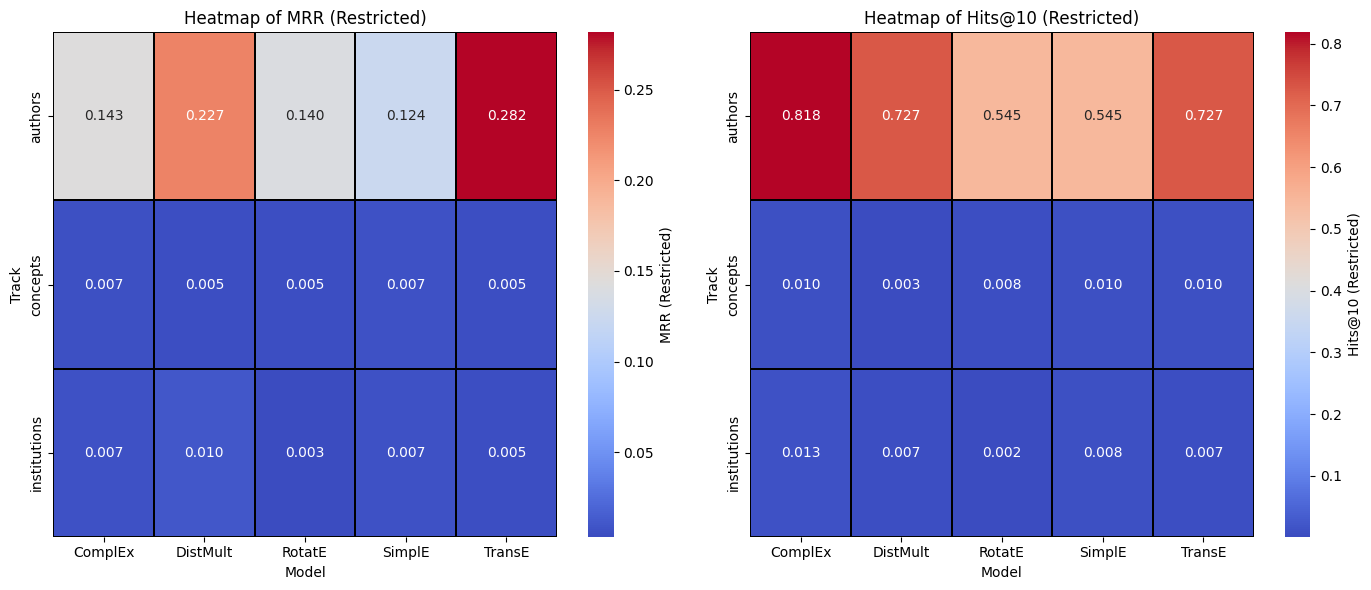

In [44]:
def plot_two_heatmaps(df, metric1, metric2, cmap):
    # Prepare pivoted data
    pivot1 = df.pivot(index="Track", columns="Model", values=metric1)
    pivot2 = df.pivot(index="Track", columns="Model", values=metric2)

    fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 🔹 side by side (1 row, 2 columns)

    sns.heatmap(pivot1, annot=True, fmt=".3f", cmap=cmap, cbar_kws={'label': metric1}, ax=axes[0],linewidths=0.1, linecolor="black")
    axes[0].set_title(f"Heatmap of {metric1}")
    axes[0].set_ylabel("Track")
    axes[0].set_xlabel("Model")

    sns.heatmap(pivot2, annot=True, fmt=".3f", cmap=cmap, cbar_kws={'label': metric2}, ax=axes[1],linewidths=0.1, linecolor="black")
    axes[1].set_title(f"Heatmap of {metric2}")
    axes[1].set_ylabel("Track")
    axes[1].set_xlabel("Model")

    plt.tight_layout()
    plt.show()

# Example call
plot_two_heatmaps(df_results, "MRR (Restricted)", "Hits@10 (Restricted)", cmap="coolwarm")

The heatmaps visualize what was previously discussed.

Brighter (red) cells indicate stronger performance, while darker (blue) cells reflect weaker results.

From the visualization, it’s clear that the **Author** track consistently outperforms the others, with **TransE** and **DistMult** showing the highest scores across both metrics.  

For **Concepts** and **Institutions**, performance is much lower, reflecting the sparsity and weaker overlap between the knowledge graphs in those domains.  
Overall, this side-by-side heatmap provides an intuitive comparison of embedding model quality across different types of entity alignments.



## **Q: "Did embeddings bring SOA entities closer to their YAGO counterparts?"**

Following code answers this  visually. For each track, it loads the **top-3 models** (by restricted MRR) and their saved **entity embeddings**, gathers the **gold test alignment pairs** (SOA id ↔ YAGO id), and extracts the corresponding vectors. Because some models (e.g., **ComplEx**) produce complex embeddings, the code converts them to real vectors by concatenating real and imaginary parts. 

To make the scatterplot tractable, it optionally compresses the vectors with **PCA** (Principal Component Analysis, a technique from machine learning, commonly applied for dimensionality reduction) (to ≤50 dims) and then projects them to 2-D using **t-SNE**. The resulting plot shows points colored by **model** and marked by **side** (● SOA, × YAGO); for the *authors* track, labels are drawn for clarity. If embeddings captured alignment, you should see **SOA points lying near their YAGO partners** (often forming tight pairs or small clusters) for the better models. The routine standardizes dims across models, limits pairs (`max_pairs`), and uses a consistent random seed so you can compare models fairly.


Top 3 for concepts: ['SimplE', 'ComplEx', 'TransE']


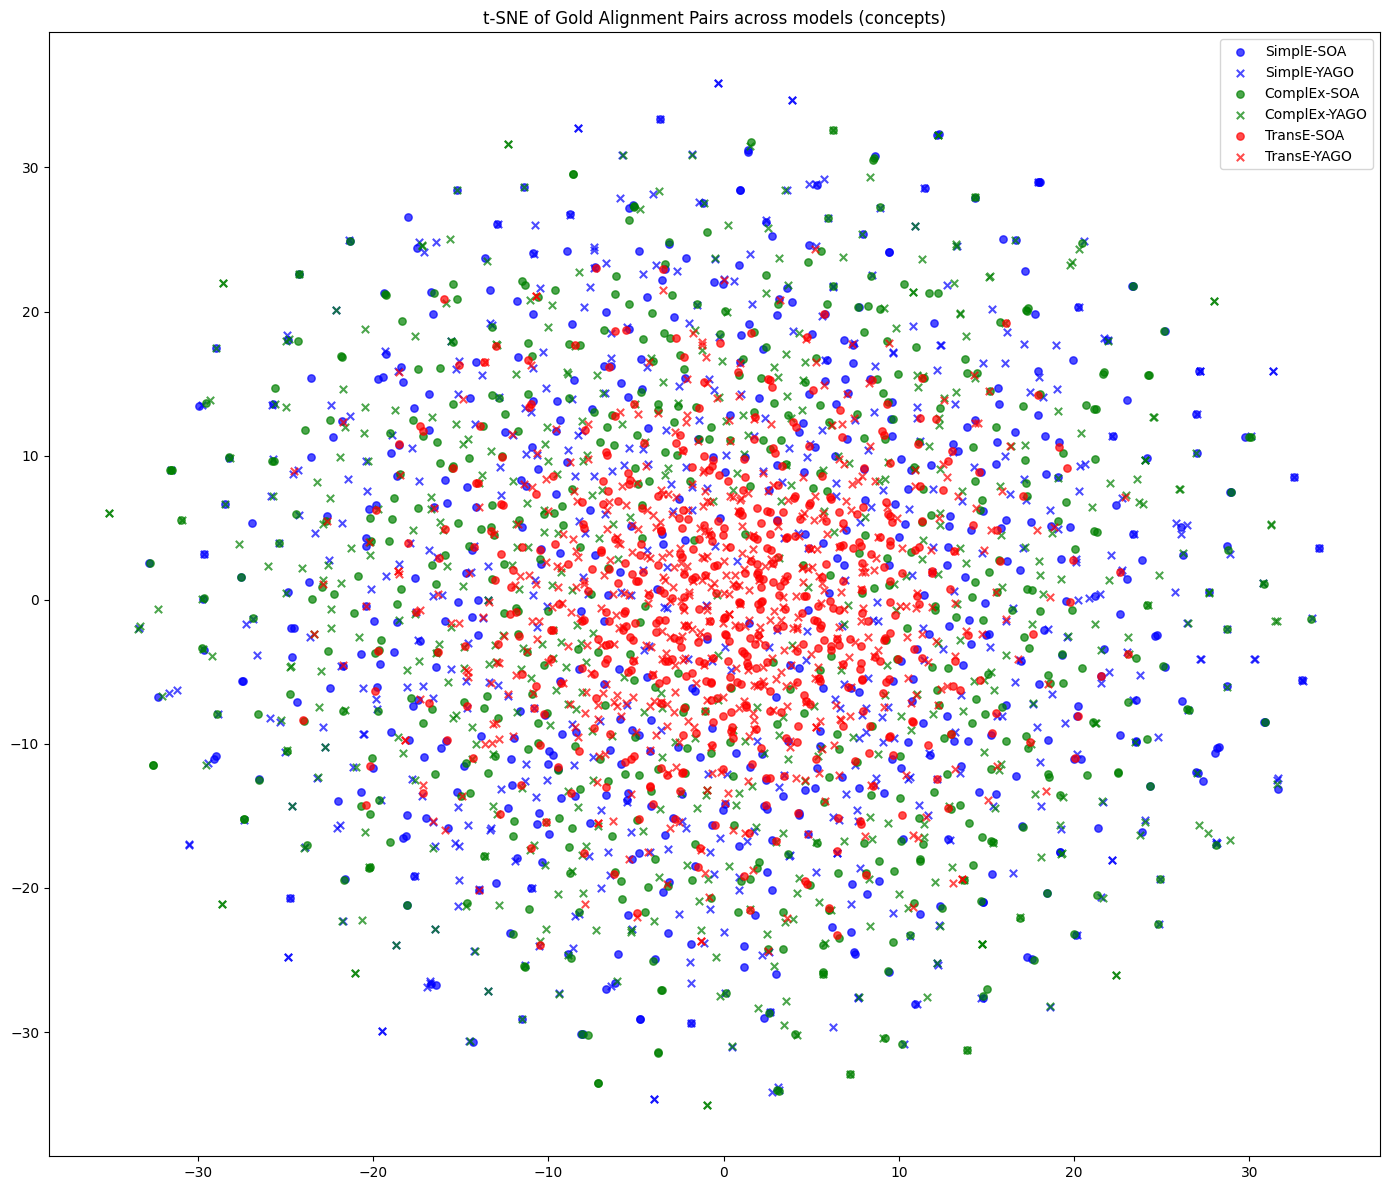

Top 3 for institutions: ['DistMult', 'SimplE', 'ComplEx']


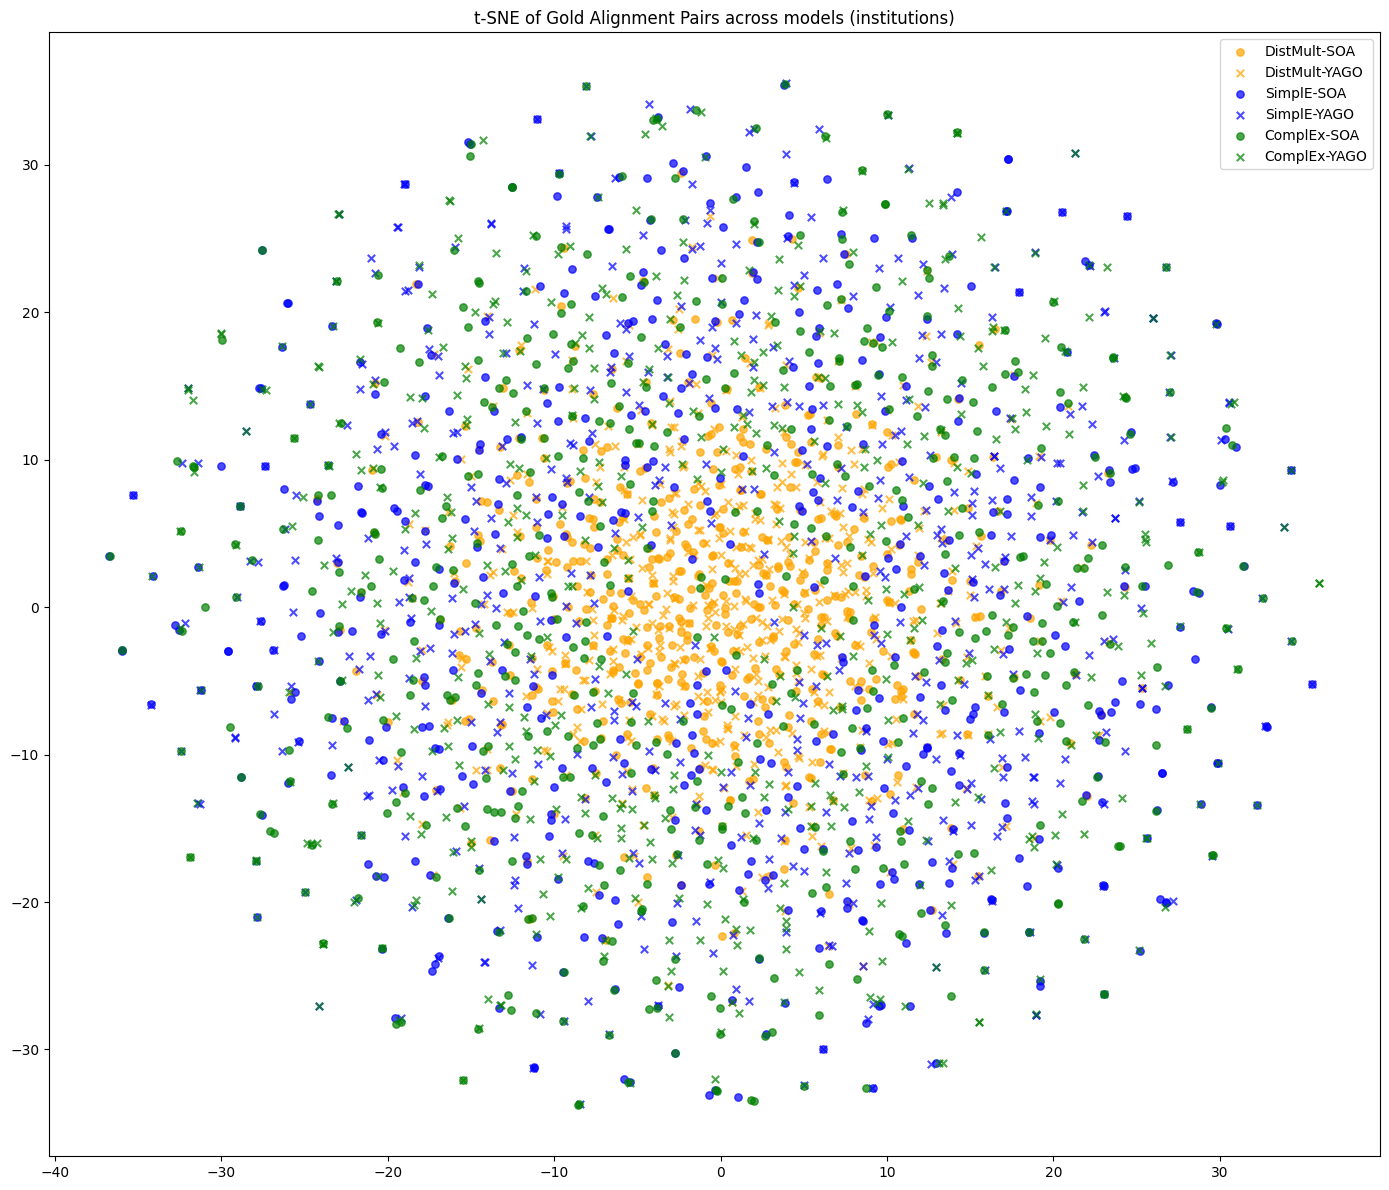

Top 3 for authors: ['TransE', 'DistMult', 'ComplEx']


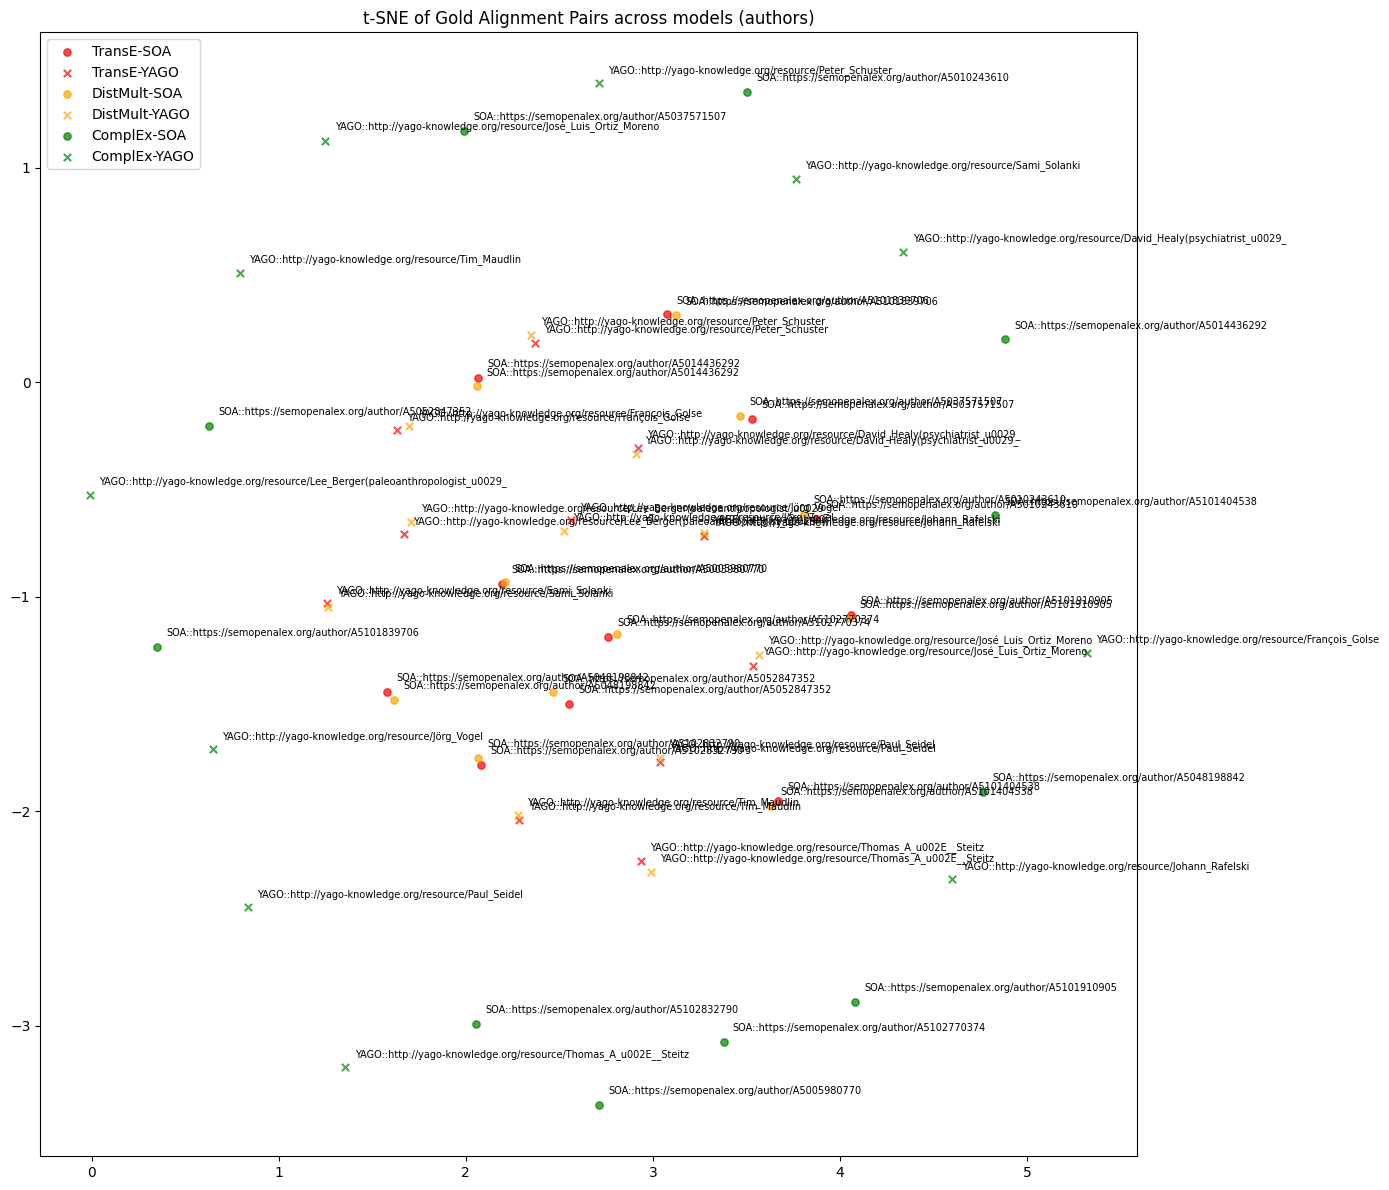

In [59]:
# ---------- helpers ----------
def load_gold_links(track):
    C = TRACKS[track]
    train_links = load_links_from_csv(C["train_path"], C["gold_src"], C["gold_tgt"])
    valid_links = load_links_from_csv(C["valid_path"], C["gold_src"], C["gold_tgt"])
    test_links  = load_links_from_csv(C["test_path"],  C["gold_src"], C["gold_tgt"])
    return train_links, valid_links, test_links

def complex_to_real(x: np.ndarray) -> np.ndarray:
    """Return a purely real embedding matrix. If complex, concat [real, imag]."""
    if np.iscomplexobj(x):
        return np.concatenate([x.real, x.imag], axis=1)
    return x

def safe_pca(X: np.ndarray, target_dim: int, random_state=42) -> np.ndarray:
    """Run PCA but keep n_components <= min(n_samples, n_features)."""
    max_nc = min(X.shape[0], X.shape[1])
    ncomp = min(target_dim, max_nc) if target_dim else max_nc
    if X.shape[1] > ncomp:
        return PCA(n_components=ncomp, random_state=random_state).fit_transform(X)
    return X

def visualize_gold_pairs_tsne_multi(track, model_names, gold_links, max_pairs=1000, pca_dim=50):
    """
    Compare multiple embedding models on the same gold alignment pairs using PCA+t-SNE.
    Labels all points for 'authors' track (SOA + YAGO).
    """
    all_embs, all_models, all_sides, all_names = [], [], [], []

    for model in model_names:
        # Load embeddings
        emb_dir = os.path.join(BASE, "trained_models", track, model, "embeddings")
        X = np.load(os.path.join(emb_dir, "entity_embeddings.npy"))
        with open(os.path.join(emb_dir, "ent_id_to_label.json"), "r") as f:
            id2lbl = json.load(f)
        lbl2id = {v: int(k) for k, v in id2lbl.items()}

        # Collect gold pair embeddings + names
        src_ids, tgt_ids, src_names, tgt_names = [], [], [], []
        for s, y in gold_links[:max_pairs]:
            s_lbl, y_lbl = f"SOA::{s}", f"YAGO::{y}"
            if s_lbl in lbl2id and y_lbl in lbl2id:
                src_ids.append(lbl2id[s_lbl])
                tgt_ids.append(lbl2id[y_lbl])
                src_names.append(s_lbl)
                tgt_names.append(y_lbl)

        if not src_ids:
            print(f"No gold pairs found for model {model}. Skipping.")
            continue

        pair_ids = src_ids + tgt_ids
        embs = X[pair_ids]

        # Handle complex embeddings (e.g., ComplEx)
        if np.iscomplexobj(embs):
            embs = np.concatenate([embs.real, embs.imag], axis=1)

        # Store
        all_embs.append(embs)
        all_models.extend([model] * len(pair_ids))
        all_sides.extend(["SOA"] * len(src_ids) + ["YAGO"] * len(tgt_ids))
        all_names.extend(src_names + tgt_names)

    if not all_embs:
        print("No embeddings to visualize.")
        return

    # Ensure equal dimensionality
    min_dim = min(e.shape[1] for e in all_embs)
    all_embs = [e[:, :min_dim] for e in all_embs]

    # Stack embeddings
    all_embs = np.vstack(all_embs)

    # Optional PCA for speed — auto clamp
    if pca_dim and all_embs.shape[1] > pca_dim:
        allowed_dim = min(pca_dim, min(all_embs.shape))
        all_embs = PCA(n_components=allowed_dim, random_state=42).fit_transform(all_embs)

    # Run t-SNE
    proj = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(all_embs)

    # --- Plot ---
    plt.figure(figsize=(14, 12))
    model_colors = {
        "TransE": "red",
        "ComplEx": "green",
        "SimplE": "blue",
        "DistMult": "orange",
        "RotatE": "purple"
    }
    markers = {"SOA": "o", "YAGO": "x"}

    for model in model_names:
        for side in ["SOA", "YAGO"]:
            mask = [(m == model and s == side) for m, s in zip(all_models, all_sides)]
            if any(mask):
                idxs = np.where(mask)[0]
                plt.scatter(
                    proj[idxs, 0],
                    proj[idxs, 1],
                    c=model_colors.get(model, "black"),
                    alpha=0.7, s=28,
                    marker=markers[side],
                    label=f"{model}-{side}"
                )
                # --- Label for AUTHORS track (SOA + YAGO) ---
                if track == "authors":
                    for i in idxs:
                        plt.text(
                            proj[i, 0] + 0.05, proj[i, 1] + 0.05,
                            all_names[i],
                            fontsize=7
                        )

    plt.title(f"t-SNE of Gold Alignment Pairs across models ({track})")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- pick top3 from your df_results and plot ----------
def get_top3_models(df_results, track):
    df_t = df_results[(df_results["Track"] == track) & (df_results["Model"].isin(["TransE","ComplEx","DistMult","RotatE","SimplE"]))]
    df_t = df_t.dropna(subset=["MRR (Restricted)"])
    return df_t.sort_values("MRR (Restricted)", ascending=False).head(3)["Model"].tolist()

tracks = ["concepts", "institutions", "authors"]
for track in tracks:
    _, _, test_links = load_gold_links(track)
    top3 = get_top3_models(df_results, track)
    print(f"Top 3 for {track}: {top3}")
    visualize_gold_pairs_tsne_multi(track, top3, test_links, max_pairs=500, pca_dim=50)

These t-SNE visualizations show how well the trained embeddings position corresponding SemOpenAlex and YAGO entities in a shared space.  

For the *authors* track, several SOA–YAGO pairs appear close together, indicating successful alignment, whereas for *concepts* and *institutions*, points remain more dispersed, suggesting weaker cross-graph correspondence despite shared embedding training.


After identifying the **top 3 embedding models per track** (based on restricted MRR and Hits@k),  
the next goal is to apply **mapping-based alignment techniques**, specifically **MTransE**, **GNN**, and **BERT-INT**, on top of those best-performing base embeddings.  
These methods aim to further **align the embedding spaces** of SemOpenAlex and YAGO by learning transformations or interaction patterns that explicitly map entities across graphs, improving cross-graph consistency and alignment accuracy.

# **EA Module**

###  **MTransE (Mapping-based TransE)** ##
It is an entity alignment model built on top of TransE embeddings. The idea is simple:
* You first train embeddings separately for each knowledge graph (here: SOA and YAGO).
Those embeddings live in different vector spaces, so they are not directly comparable.
* MTransE learns a linear transformation matrix W that maps entities from one KG’s space (SOA) into the other KG’s space (YAGO) (it learn a linear mapping 𝑊 that aligns entities across spaces).
* Training is supervised with known gold alignment links (pairs of equivalent entities across KGs).
* Objective is to  minimize distance between mapped SOA embeddings and their aligned YAGO embeddings (for train links).

In [60]:
# ------------------------------
# Load embeddings and vocab
# ------------------------------
def load_embeddings(emb_dir):
    X = np.load(os.path.join(emb_dir, "entity_embeddings.npy"))
    with open(os.path.join(emb_dir, "ent_id_to_label.json"), "r") as f:
        id2lbl = json.load(f)

    # JSON keys are strings, convert them to ints
    id2lbl = {int(k): v for k, v in id2lbl.items()}
    lbl2id = {v: k for k, v in id2lbl.items()}
    return torch.tensor(X, dtype=torch.float32), id2lbl, lbl2id

# ------------------------------
# Build alignment tensors
# ------------------------------
def build_alignment_tensors(train_links, test_links, lbl2id):
    train_src, train_tgt = [], []
    for s,y in train_links:
        if f"SOA::{s}" in lbl2id and f"YAGO::{y}" in lbl2id:
            train_src.append(lbl2id[f"SOA::{s}"])
            train_tgt.append(lbl2id[f"YAGO::{y}"])
    test_src, test_tgt = [], []
    for s,y in test_links:
        if f"SOA::{s}" in lbl2id and f"YAGO::{y}" in lbl2id:
            test_src.append(lbl2id[f"SOA::{s}"])
            test_tgt.append(lbl2id[f"YAGO::{y}"])
    return train_src, train_tgt, test_src, test_tgt

# ------------------------------
# Define MTransE
# ------------------------------
class MTransE(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.W = nn.Linear(dim, dim, bias=False)

    def forward(self, x):
        return self.W(x)

# ------------------------------
# Training loop
# ------------------------------
def train_mtranse(model, optimizer, src_embs, tgt_embs, epochs=100, batch_size=128):
    loss_fn = nn.MSELoss()
    dataset = TensorDataset(src_embs, tgt_embs)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for epoch in range(epochs):
        total_loss = 0
        for xb,yb in loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if epoch % 10 == 0:
            print(f"Epoch {epoch} loss={total_loss/len(loader):.4f}")

# ------------------------------
# Evaluation
# ------------------------------
def eval_mtranse(model, src_embs, tgt_ids, tgt_all, yago_mask):
    ks = (1,3,5,10)
    hits = {k:0 for k in ks}
    rr_sum, n = 0.0, 0
    with torch.no_grad():
        mapped = nn.functional.normalize(model(src_embs), p=2, dim=1)
        tgt_all_norm = nn.functional.normalize(tgt_all, p=2, dim=1)
        # Only keep YAGO rows
        tgt_candidates = tgt_all_norm[yago_mask]
        for i, true_idx in enumerate(tgt_ids):
            # skip if this gold entity isn't YAGO
            if not yago_mask[true_idx]:
                continue
            row = (mapped[i] @ tgt_candidates.T)
            true_score = (mapped[i] @ tgt_all_norm[true_idx]).item()
            rank = int((row > true_score).sum().item()) + 1
            rr_sum += 1.0/rank
            for k in ks:
                if rank <= k: hits[k]+=1
            n+=1
    out = {"n": n, "MRR": rr_sum/n if n else 0}
    out.update({f"Hits@{k}": hits[k]/n if n else 0 for k in ks})
    return out

# Example usage
results_mtranse = []

for track in ["concepts", "institutions", "authors"]:
    top3 = get_top3_models(df_results, track)
    print(f"\n=== {track.upper()} | Top-3 models: {top3} ===")

    for model_name in top3:
        emb_dir = os.path.join(BASE, "trained_models", track, model_name, "embeddings")
        X, id2lbl, lbl2id = load_embeddings(emb_dir)

        # Load links
        train_links = load_links_from_csv(TRACKS[track]["train_path"], TRACKS[track]["gold_src"], TRACKS[track]["gold_tgt"])
        test_links  = load_links_from_csv(TRACKS[track]["test_path"],  TRACKS[track]["gold_src"], TRACKS[track]["gold_tgt"])

        # Build alignment tensors
        train_src_ids, train_tgt_ids, test_src_ids, test_tgt_ids = build_alignment_tensors(train_links, test_links, lbl2id)

        # Prepare tensors
        src_train, tgt_train = X[train_src_ids], X[train_tgt_ids]

        # Train MTransE
        model = MTransE(dim=X.shape[1])
        opt = optim.Adam(model.parameters(), lr=1e-3)
        train_mtranse(model, opt, src_train, tgt_train, epochs=200)

        # Eval
        src_test = X[test_src_ids]
        yago_mask = np.array([lbl.startswith("YAGO::") for _, lbl in sorted(id2lbl.items())])
        yago_mask = torch.tensor(yago_mask, dtype=torch.bool)

        metrics = eval_mtranse(model, src_test, test_tgt_ids, X, yago_mask)
        print(f"{model_name} → {metrics}")

        results_mtranse.append({
            "Track": track,
            "Model": model_name,
            **metrics
        })

df_mtranse = pd.DataFrame(results_mtranse)
display(df_mtranse)


=== CONCEPTS | Top-3 models: ['SimplE', 'ComplEx', 'TransE'] ===
Epoch 0 loss=1.3555
Epoch 10 loss=1.1455
Epoch 20 loss=1.0010
Epoch 30 loss=0.9012
Epoch 40 loss=0.8310
Epoch 50 loss=0.7809
Epoch 60 loss=0.7442
Epoch 70 loss=0.7167
Epoch 80 loss=0.6952
Epoch 90 loss=0.6786
Epoch 100 loss=0.6656
Epoch 110 loss=0.6552
Epoch 120 loss=0.6467
Epoch 130 loss=0.6397
Epoch 140 loss=0.6342
Epoch 150 loss=0.6299
Epoch 160 loss=0.6260
Epoch 170 loss=0.6227
Epoch 180 loss=0.6201
Epoch 190 loss=0.6179
SimplE → {'n': 876, 'MRR': 3.730635310721956e-05, 'Hits@1': 0.0, 'Hits@3': 0.0, 'Hits@5': 0.0, 'Hits@10': 0.0}


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15984\3359204531.py:18: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Copy.cpp:307.)
  return torch.tensor(X, dtype=torch.float32), id2lbl, lbl2id


Epoch 0 loss=1.2861
Epoch 10 loss=1.0844
Epoch 20 loss=0.9461
Epoch 30 loss=0.8515
Epoch 40 loss=0.7853
Epoch 50 loss=0.7386
Epoch 60 loss=0.7048
Epoch 70 loss=0.6792
Epoch 80 loss=0.6600
Epoch 90 loss=0.6449
Epoch 100 loss=0.6329
Epoch 110 loss=0.6239
Epoch 120 loss=0.6163
Epoch 130 loss=0.6101
Epoch 140 loss=0.6055
Epoch 150 loss=0.6012
Epoch 160 loss=0.5979
Epoch 170 loss=0.5953
Epoch 180 loss=0.5928
Epoch 190 loss=0.5911
ComplEx → {'n': 876, 'MRR': 7.607546785400224e-05, 'Hits@1': 0.0, 'Hits@3': 0.0, 'Hits@5': 0.0, 'Hits@10': 0.0}
Epoch 0 loss=0.0135
Epoch 10 loss=0.0113
Epoch 20 loss=0.0098
Epoch 30 loss=0.0087
Epoch 40 loss=0.0079
Epoch 50 loss=0.0074
Epoch 60 loss=0.0070
Epoch 70 loss=0.0066
Epoch 80 loss=0.0064
Epoch 90 loss=0.0062
Epoch 100 loss=0.0061
Epoch 110 loss=0.0059
Epoch 120 loss=0.0058
Epoch 130 loss=0.0058
Epoch 140 loss=0.0057
Epoch 150 loss=0.0056
Epoch 160 loss=0.0056
Epoch 170 loss=0.0055
Epoch 180 loss=0.0055
Epoch 190 loss=0.0055
TransE → {'n': 876, 'MRR': 3.8

,Track,Model,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10
0,concepts,SimplE,876,0.000037,0.0,0.0,0.0,0.000000
1,concepts,ComplEx,876,0.000076,0.0,0.0,0.0,0.000000
2,concepts,TransE,876,0.000038,0.0,0.0,0.0,0.000000
3,institutions,DistMult,602,0.000431,0.0,0.0,0.0,0.001661
4,institutions,SimplE,602,0.000303,0.0,0.0,0.0,0.000000
5,institutions,ComplEx,602,0.000315,0.0,0.0,0.0,0.000000
6,authors,TransE,11,0.000051,0.0,0.0,0.0,0.000000
7,authors,DistMult,11,0.000043,0.0,0.0,0.0,0.000000
8,authors,ComplEx,11,0.000017,0.0,0.0,0.0,0.000000


*MTransE is just a linear mapping trained with MSE. If embeddings are already poorly aligned (like the restricted baselines showed earlier), the linear projection won’t recover alignment well. Seing the results, means even though training reduces MSE, **the mapping isn’t helping with actual alignment**.*

### **Graph Neural Network (GNN) for Entity Alignment**

While translational models (TransE, ComplEx, etc.) and linear mapping models (MTransE) learn entity embeddings and transformations based on triples, Graph Neural Networks (GNNs) explicitly exploit the **graph structure** of the knowledge bases. 

Here we implement a simple **2-layer Graph Convolutional Network (GCN)** to propagate neighborhood information across entities from SOA and YAGO. The idea is that structurally similar nodes across KGs should have embeddings that align after neighborhood aggregation.

The model is trained in a supervised alignment setting, where SOA entities act as queries, their aligned YAGO counterparts serve as positives, and other YAGO entities are sampled as negatives. Training is based on the InfoNCE contrastive loss, encouraging the model to maximize similarity between true alignment pairs while minimizing it against negatives. Evaluation is performed in a restricted candidate setting, ranking each SOA query only among gold YAGO entities to ensure that metrics like MRR and Hits@K reflect true alignment quality without noise from unrelated entities.


In [12]:
# ------------------------------
# Utils: load embeddings + vocab
# ------------------------------
def load_embeddings(emb_dir):
    X = np.load(os.path.join(emb_dir, "entity_embeddings.npy"))
    with open(os.path.join(emb_dir, "ent_id_to_label.json"), "r") as f:
        id2lbl = json.load(f)
    id2lbl = {int(k): v for k, v in id2lbl.items()}
    lbl2id = {v: k for k, v in id2lbl.items()}
    X = torch.tensor(X, dtype=torch.float32)
    return X, id2lbl, lbl2id

# ------------------------------
# Your CSV loaders (already defined earlier)
# ------------------------------
# expecting load_triples_from_edge_csv, load_links_from_csv, make_merged_triples, ensure_eval_entities_present
# and TRACKS dict to be defined in the environment (from your previous code)
# If not, paste those helpers here.

# ------------------------------
# Build merged triples consistent with saved vocab
# ------------------------------
def build_graph_triples(track_name):
    C = TRACKS[track_name]
    triples_soa  = load_triples_from_edge_csv(C["soa_triples_path"],  C["soa_head"], C["soa_tail"], C["soa_rel"])
    triples_yago = load_triples_from_edge_csv(C["yago_triples_path"], C["yago_head"], C["yago_tail"], C["yago_rel"])
    train_links = load_links_from_csv(C["train_path"], C["gold_src"], C["gold_tgt"])
    valid_links = load_links_from_csv(C["valid_path"], C["gold_src"], C["gold_tgt"])
    test_links  = load_links_from_csv(C["test_path"],  C["gold_src"], C["gold_tgt"])

    merged_train = make_merged_triples(triples_soa, triples_yago, train_links)
    ensure_eval_entities_present(merged_train, valid_links, test_links)

    return merged_train, train_links, valid_links, test_links

# ------------------------------
# Build sparse normalized adjacency \hat{A} = D^{-1/2}(A+I)D^{-1/2}
# using the *existing* lbl2id from saved embeddings (so indices align)
# ------------------------------
def build_sparse_adj(merged_triples, lbl2id):
    edges = []
    for h, r, t in merged_triples:
        if h in lbl2id and t in lbl2id:
            u = lbl2id[h]; v = lbl2id[t]
            edges.append((u, v))
            edges.append((v, u))  # undirected

    n = len(lbl2id)
    if len(edges) == 0:
        raise RuntimeError("No edges mapped into current vocabulary. Check label prefixes and saved vocab.")

    # add self-loops
    edges += [(i, i) for i in range(n)]

    # build COO
    edge_index = torch.tensor(edges, dtype=torch.long).T  # shape [2, E]
    values = torch.ones(edge_index.size(1), dtype=torch.float32)

    # degree
    deg = torch.zeros(n, dtype=torch.float32)
    deg.index_add_(0, edge_index[0], values)
    deg = torch.clamp(deg, min=1.0)

    # symmetric norm
    d_inv_sqrt = deg.pow(-0.5)
    norm_vals = d_inv_sqrt[edge_index[0]] * values * d_inv_sqrt[edge_index[1]]

    adj = torch.sparse_coo_tensor(edge_index, norm_vals, size=(n, n)).coalesce()
    return adj

# ------------------------------
# Simple 2-layer GCN
# ------------------------------
class GCNLayer(nn.Module):
    def __init__(self, in_dim, out_dim, dropout=0.0):
        super().__init__()
        self.lin = nn.Linear(in_dim, out_dim, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, adj):  # adj: sparse normalized
        x = self.dropout(x)
        x = torch.sparse.mm(adj, x)     # neighbor aggregation
        x = self.lin(x)
        return x

class GCNEncoder(nn.Module):
    def __init__(self, in_dim, hid_dim=256, out_dim=256, dropout=0.1):
        super().__init__()
        self.gcn1 = GCNLayer(in_dim, hid_dim, dropout)
        self.gcn2 = GCNLayer(hid_dim, out_dim, dropout)

    def forward(self, x, adj):
        h = self.gcn1(x, adj)
        h = F.relu(h)
        z = self.gcn2(h, adj)
        z = F.normalize(z, p=2, dim=1)  # normalize for cosine similarity
        return z

# ------------------------------
# Build supervised index tensors for EA
# ------------------------------
def indices_from_links(links, lbl2id):
    src_ids, tgt_ids = [], []
    for s, y in links:
        ls = f"SOA::{s}"; ly = f"YAGO::{y}"
        if ls in lbl2id and ly in lbl2id:
            src_ids.append(lbl2id[ls])
            tgt_ids.append(lbl2id[ly])
    return torch.tensor(src_ids, dtype=torch.long), torch.tensor(tgt_ids, dtype=torch.long)

# ------------------------------
# InfoNCE loss over a batch:
# SOA embeddings are queries; YAGO embeddings are positives; negatives from YAGO pool
# ------------------------------
def info_nce_loss(z, src_idx, tgt_idx, yago_pool, temperature=0.05, neg_k=256):
    """
    Vectorized InfoNCE loss with GPU-based negative sampling.
    """
    device = z.device
    B = src_idx.size(0)

    # Queries and positives
    q = z[src_idx]  # queries [B, D]
    p = z[tgt_idx]  # positives [B, D]

    # Sample negatives in one go
    rand_idx = torch.randint(0, len(yago_pool), (B, neg_k), device=device)
    neg_mat = yago_pool[rand_idx]  # [B, K]

    # Make sure no negatives == true target
    mask = neg_mat.eq(tgt_idx.unsqueeze(1))
    while mask.any():
        neg_mat[mask] = yago_pool[torch.randint(0, len(yago_pool), (mask.sum(),), device=device)]
        mask = neg_mat.eq(tgt_idx.unsqueeze(1))

    # Cosine similarities
    pos_sim = (q * p).sum(dim=1, keepdim=True) / temperature    # [B,1]
    neg_sim = (q.unsqueeze(1) * z[neg_mat]).sum(dim=2) / temperature  # [B,K]

    logits = torch.cat([pos_sim, neg_sim], dim=1)   # [B,1+K]
    labels = torch.zeros(B, dtype=torch.long, device=device)  # positives at index 0
    loss = F.cross_entropy(logits, labels)
    return loss

# ------------------------------
# Train loop
# ------------------------------
def train_gnn_ea(
    track="concepts",
    emb_model="ComplEx",
    emb_dim_proj=256,
    batch_size=256,
    epochs=50,
    lr=1e-3,
    neg_k=1024,
    temperature=0.05,
    device=None,
    patience = 10
):
    # 1) Load embeddings & vocab
    emb_dir = os.path.join(BASE, "trained_models", track, emb_model, "embeddings")
    X, id2lbl, lbl2id = load_embeddings(emb_dir)

    # 2) Build graph triples & splits
    merged_triples, train_links, valid_links, test_links = build_graph_triples(track)

    # 3) Sparse adjacency over known vocab
    adj = build_sparse_adj(merged_triples, lbl2id)

    # 4) SOA/YAGO index pools
    labels_sorted = [lbl for _, lbl in sorted(id2lbl.items())]
    yago_pool = torch.tensor([i for i,lbl in sorted(id2lbl.items()) if lbl.startswith("YAGO::")], dtype=torch.long)
    yago_pool = yago_pool if yago_pool.numel() > 0 else torch.arange(X.size(0), dtype=torch.long)

    train_src, train_tgt = indices_from_links(train_links, lbl2id)
    valid_src, valid_tgt = indices_from_links(valid_links, lbl2id)
    test_src,  test_tgt  = indices_from_links(test_links,  lbl2id)

    print(f"[{track}/{emb_model}] Train pairs: {len(train_src)} | Valid: {len(valid_src)} | Test: {len(test_src)}")
    if len(train_src) == 0:
        raise RuntimeError("No train pairs found in the saved vocabulary. Make sure the track matches the embeddings.")

    # 5) Model
    in_dim = X.size(1)
    enc = GCNEncoder(in_dim, hid_dim=emb_dim_proj, out_dim=emb_dim_proj, dropout=0.1)

    # 6) Device & move
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    enc = enc.to(device)
    X = X.to(device)
    adj = adj.to(device)
    yago_pool = yago_pool.to(device)
    train_src = train_src.to(device); train_tgt = train_tgt.to(device)
    valid_src = valid_src.to(device); valid_tgt = valid_tgt.to(device)
    test_src  = test_src.to(device);  test_tgt  = test_tgt.to(device)

    # 7) Optimizer
    opt = torch.optim.Adam(enc.parameters(), lr=lr)

    # 8) Mini-batching over train pairs
    def iterate_batches(src_idx, tgt_idx, bs):
        order = torch.randperm(src_idx.size(0), device=src_idx.device)
        for i in range(0, src_idx.size(0), bs):
            j = order[i:i+bs]
            yield src_idx[j], tgt_idx[j]

    # 9) Training
    best_val = -1.0
    best_state = None
    patience_counter = 0

    for ep in range(1, epochs+1):
            enc.train()
            z = F.normalize(enc(X, adj), p=2, dim=1)  
            total = 0.0; steps = 0

            for bsrc, btgt in iterate_batches(train_src, train_tgt, batch_size):
                opt.zero_grad()
                loss = info_nce_loss(z, bsrc, btgt, yago_pool, temperature=temperature, neg_k=neg_k)
                loss.backward()
                opt.step()
                total += loss.item(); steps += 1

            if ep % 5 == 0 or ep == 1:
                enc.eval()
                with torch.no_grad():
                    z = enc(X, adj)
                    val_metrics = eval_local(z, valid_src, valid_tgt, yago_pool)
                mrr = val_metrics["MRR"] if val_metrics["n"] > 0 else 0.0
                print(f"Epoch {ep:03d} | loss={total/max(1,steps):.4f} | VAL n={val_metrics['n']} "
                    f"MRR={mrr:.4f} H@1={val_metrics['Hits@1']:.3f} H@10={val_metrics['Hits@10']:.3f}")

                if mrr > best_val:
                    best_val = mrr
                    best_state = {k: v.cpu().clone() for k, v in enc.state_dict().items()}
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print(f"⏹️ Early stopping at epoch {ep}")
                        break

    enc.eval()
    with torch.no_grad():
        z = enc(X, adj)
        test_metrics = eval_local(z, test_src, test_tgt, yago_pool)
    print("TEST (restricted gold YAGO):", test_metrics)
    return enc, z, test_metrics, (X, id2lbl, lbl2id)

# ------------------------------
# Evaluation: rank SOA query against restricted YAGO pool
# ------------------------------
def eval_local(z, src_idx, tgt_idx, yago_pool):
    ks = (1,3,5,10)
    hits = {k:0 for k in ks}
    rr_sum = 0.0; n = 0
    z = F.normalize(z, p=2, dim=1)

    candidates = [t.item() for t in tgt_idx.unique()]  # only gold YAGO entities
    cand_embs = z[candidates]

    for i in range(src_idx.numel()):
        s = src_idx[i].item()
        t = tgt_idx[i].item()
        q = z[s]

        scores = cand_embs @ q   # cosine similarity against all restricted YAGO
        true_idx = candidates.index(t)  # gold target position
        true_score = scores[true_idx].item()
        rank = int((scores > true_score).sum().item()) + 1

        rr_sum += 1.0 / rank
        for k in ks:
            if rank <= k: hits[k] += 1
        n += 1

    out = {"n": n, "MRR": rr_sum/n if n else 0}
    out.update({f"Hits@{k}": hits[k]/n if n else 0 for k in ks})
    return out

# Try: track="concepts" with any embedding you trained (e.g., "ComplEx" or "TransE")
results_gnn = []

for track in ["concepts", "institutions", "authors"]:
    top3 = get_top3_models(df_results, track)  # same function you used for MTransE
    print(f"\n=== {track.upper()} | Top-3 models: {top3} ===")

    for model_name in top3:
        enc, z, metrics, _ = train_gnn_ea(
            track=track,
            emb_model=model_name,
            emb_dim_proj=256,
            batch_size=256,
            epochs=100,
            lr=1e-3,
            neg_k=512,       # smaller if GPU runs out of memory
            temperature=0.05
        )
        results_gnn.append({
            "Track": track,
            "Model": model_name,
            **metrics
        })

df_gnn = pd.DataFrame(results_gnn)
display(df_gnn)


=== CONCEPTS | Top-3 models: ['SimplE', 'ComplEx', 'TransE'] ===
[concepts/SimplE] Train pairs: 250 | Valid: 125 | Test: 876
Epoch 001 | loss=0.0286 | VAL n=125 MRR=0.0297 H@1=0.000 H@10=0.056
Epoch 005 | loss=0.0014 | VAL n=125 MRR=0.0305 H@1=0.000 H@10=0.056
Epoch 010 | loss=0.0027 | VAL n=125 MRR=0.0306 H@1=0.000 H@10=0.056
Epoch 015 | loss=0.0016 | VAL n=125 MRR=0.0312 H@1=0.000 H@10=0.056
Epoch 020 | loss=0.0007 | VAL n=125 MRR=0.0314 H@1=0.000 H@10=0.048
Epoch 025 | loss=0.0006 | VAL n=125 MRR=0.0310 H@1=0.000 H@10=0.056
Epoch 030 | loss=0.0004 | VAL n=125 MRR=0.0301 H@1=0.000 H@10=0.064
Epoch 035 | loss=0.0004 | VAL n=125 MRR=0.0299 H@1=0.000 H@10=0.048
Epoch 040 | loss=0.0003 | VAL n=125 MRR=0.0301 H@1=0.000 H@10=0.056
Epoch 045 | loss=0.0003 | VAL n=125 MRR=0.0307 H@1=0.000 H@10=0.048
Epoch 050 | loss=0.0003 | VAL n=125 MRR=0.0300 H@1=0.000 H@10=0.056
Epoch 055 | loss=0.0002 | VAL n=125 MRR=0.0299 H@1=0.000 H@10=0.056
Epoch 060 | loss=0.0004 | VAL n=125 MRR=0.0284 H@1=0.000 H

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27944\2368045462.py:16: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Copy.cpp:307.)
  X = torch.tensor(X, dtype=torch.float32)


[concepts/ComplEx] Train pairs: 250 | Valid: 125 | Test: 876
Epoch 001 | loss=0.0225 | VAL n=125 MRR=0.0315 H@1=0.000 H@10=0.064
Epoch 005 | loss=0.0013 | VAL n=125 MRR=0.0338 H@1=0.000 H@10=0.072
Epoch 010 | loss=0.0020 | VAL n=125 MRR=0.0374 H@1=0.000 H@10=0.072
Epoch 015 | loss=0.0013 | VAL n=125 MRR=0.0401 H@1=0.008 H@10=0.072
Epoch 020 | loss=0.0006 | VAL n=125 MRR=0.0388 H@1=0.008 H@10=0.056
Epoch 025 | loss=0.0005 | VAL n=125 MRR=0.0343 H@1=0.000 H@10=0.056
Epoch 030 | loss=0.0004 | VAL n=125 MRR=0.0343 H@1=0.000 H@10=0.048
Epoch 035 | loss=0.0003 | VAL n=125 MRR=0.0341 H@1=0.000 H@10=0.048
Epoch 040 | loss=0.0003 | VAL n=125 MRR=0.0343 H@1=0.000 H@10=0.056
Epoch 045 | loss=0.0002 | VAL n=125 MRR=0.0350 H@1=0.000 H@10=0.064
Epoch 050 | loss=0.0006 | VAL n=125 MRR=0.0350 H@1=0.000 H@10=0.064
Epoch 055 | loss=0.0002 | VAL n=125 MRR=0.0355 H@1=0.000 H@10=0.072
Epoch 060 | loss=0.0006 | VAL n=125 MRR=0.0353 H@1=0.000 H@10=0.064
Epoch 065 | loss=0.0002 | VAL n=125 MRR=0.0353 H@1=0.00

,Track,Model,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10
0,concepts,SimplE,876,0.011474,0.003425,0.004566,0.010274,0.015982
1,concepts,ComplEx,876,0.009609,0.002283,0.002283,0.005708,0.012557
2,concepts,TransE,876,0.013708,0.006849,0.006849,0.009132,0.017123
3,institutions,DistMult,602,0.010354,0.001661,0.001661,0.004983,0.013289
4,institutions,SimplE,602,0.012602,0.004983,0.006645,0.009967,0.013289
5,institutions,ComplEx,602,0.013294,0.001661,0.008306,0.009967,0.023256
6,authors,TransE,11,0.333373,0.090909,0.545455,0.545455,0.909091
7,authors,DistMult,11,0.210180,0.000000,0.181818,0.545455,0.818182
8,authors,ComplEx,11,0.180664,0.000000,0.090909,0.545455,1.000000


The GNN-based entity alignment produced stable but modest improvements for concepts and institutions, and significantly stronger results for authors. 

For concepts, all three top models (SimplE, ComplEx, TransE) achieved low but consistent validation MRR values around 0.03–0.04, showing the model captured limited structural similarity between SOA and YAGO entities. Institutions performed similarly, with small but nonzero gains in MRR (~0.01–0.013).

In contrast, the authors track showed a clear benefit from structural propagation, reaching MRR ≈ 0.33 and Hits@10 up to 0.9, confirming that the GNN effectively leveraged relational context (e.g., co-authorship and affiliations) to align entities across graphs. 

Overall, the GNN helped most where meaningful neighborhood structure existed, but had limited impact for sparse or weakly connected entity types like concepts or institutions.

### **BERT-INT**  

BERT-INT aligns entities by turning their textual descriptions (e.g., names, titles, short context) into vectors with a pretrained language model and then matching entities whose texts are most similar. Instead of learning a KG-specific transform, it relies on BERT’s semantic space: if a SemOpenAlex entity’s text is semantically close to its YAGO counterpart’s text, their embeddings will be close and rank highly.

In [11]:
# ------------------------------
# BERT Encoder Wrapper
# ------------------------------
class BERTInt(nn.Module):
    def __init__(self, model_name="bert-base-uncased", device="cpu"):
        super().__init__()
        self.device = device
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name).to(device)
        self.bert.eval()  # we don’t fine-tune here

    def encode_texts(self, texts, batch_size=16):
        embs = []
        with torch.no_grad():
            for i in range(0, len(texts), batch_size):
                batch = texts[i:i+batch_size]
                inputs = self.tokenizer(batch, padding=True, truncation=True,
                                        return_tensors="pt", max_length=64).to(self.device)
                outputs = self.bert(**inputs).last_hidden_state  # [B, T, H]
                cls_embs = outputs[:, 0, :]  # [B, H] → [CLS] token
                cls_embs = F.normalize(cls_embs, p=2, dim=1)
                embs.append(cls_embs.cpu())
        return torch.cat(embs, dim=0)

# ------------------------------
# Evaluation function
# ------------------------------
def eval_bert_int(track, train_links, test_links, bert_model, max_pairs=None):
    # Prepare label strings
    src_texts = [s for s, _ in test_links]
    tgt_texts = [y for _, y in test_links]

    # Optionally subsample
    if max_pairs:
        src_texts, tgt_texts = src_texts[:max_pairs], tgt_texts[:max_pairs]

    # Encode with BERT
    src_embs = bert_model.encode_texts(src_texts)
    tgt_embs = bert_model.encode_texts(tgt_texts)

    # Similarity search restricted to test gold tgt set
    ks = (1,3,5,10)
    hits = {k: 0 for k in ks}
    rr_sum, n = 0.0, 0

    for i in range(len(src_texts)):
        q = src_embs[i]
        scores = tgt_embs @ q    # cosine similarity
        true_score = scores[i].item()  # same index = gold
        rank = int((scores > true_score).sum().item()) + 1

        rr_sum += 1.0/rank
        for k in ks:
            if rank <= k: hits[k]+=1
        n+=1

    metrics = {"n": n, "MRR": rr_sum/n if n else 0}
    metrics.update({f"Hits@{k}": hits[k]/n if n else 0 for k in ks})
    return metrics

# ------------------------------
# Run across tracks
# ------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = BERTInt(model_name="bert-base-uncased", device=device)

results_bert = []
for track in ["concepts", "institutions", "authors"]:
    test_links = load_links_from_csv(TRACKS[track]["test_path"],
                                     TRACKS[track]["gold_src"], TRACKS[track]["gold_tgt"])
    metrics = eval_bert_int(track, None, test_links, bert_model, max_pairs=500)  # can adjust max_pairs
    print(f"{track.upper()} → {metrics}")
    results_bert.append({"Track": track, **metrics})

df_bert = pd.DataFrame(results_bert)
display(df_bert)

CONCEPTS → {'n': 500, 'MRR': 0.013876982986513929, 'Hits@1': 0.002, 'Hits@3': 0.01, 'Hits@5': 0.01, 'Hits@10': 0.022}
INSTITUTIONS → {'n': 500, 'MRR': 0.013999262352568419, 'Hits@1': 0.004, 'Hits@3': 0.004, 'Hits@5': 0.008, 'Hits@10': 0.02}
AUTHORS → {'n': 11, 'MRR': 0.2581955922865014, 'Hits@1': 0.09090909090909091, 'Hits@3': 0.18181818181818182, 'Hits@5': 0.45454545454545453, 'Hits@10': 0.8181818181818182}


,Track,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10
0,concepts,500,0.013877,0.002000,0.010000,0.010000,0.022000
1,institutions,500,0.013999,0.004000,0.004000,0.008000,0.020000
2,authors,11,0.258196,0.090909,0.181818,0.454545,0.818182


Herem, we used a pretrained BERT-based text encoder to align SemOpenAlex and YAGO entities purely from their textual names. For each test pair, BERT produced semantic embeddings of the SOA and YAGO entity labels, and we ranked YAGO candidates by cosine similarity to the SOA query.

The results show that BERT captures moderate alignment for authors (MRR ≈ 0.26, Hits@10 ≈ 0.82), indicating that author names are distinctive and well-represented in BERT’s semantic space. In contrast, concepts and institutions achieved very low scores (MRR ≈ 0.014), likely because their surface forms are more ambiguous or less contextualized, and we used only raw labels without descriptive context.

Overall, this confirms that text-based embeddings can partially bridge entity alignment, especially for person names, but without richer textual descriptions or fine-tuning, BERT-INT alone cannot align abstract or organization-level entities effectively.

Now, let's load the previews summary files that store the evaluation metrics from our different experiments.

In [15]:
# Load results
df_all = pd.read_csv("results_all_models.csv")
df_gnn_bert = pd.read_csv("results_gnn_vs_bert.csv")
df_best = pd.read_csv("results_best_per_track.csv")

print("=== df_all ===")
display(df_all.head())

print("\n=== df_gnn_bert ===")
display(df_gnn_bert.head())

print("\n=== df_best ===")
display(df_best.head())

=== df_all ===


,Track,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10,Method
0,authors,11,0.258196,0.090909,0.181818,0.454545,0.818182,BERT-Int
1,authors,11,0.319087,0.090909,0.454545,0.545455,0.909091,GNN
2,authors,11,0.212774,0.000000,0.272727,0.454545,0.909091,GNN
3,authors,11,0.199315,0.000000,0.181818,0.272727,1.000000,GNN
4,authors,11,0.000051,0.000000,0.000000,0.000000,0.000000,MTransE



=== df_gnn_bert ===


,Track,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10,Method
0,authors,11,0.258196,0.090909,0.181818,0.454545,0.818182,BERT-Int
1,authors,11,0.319087,0.090909,0.454545,0.545455,0.909091,GNN
2,authors,11,0.212774,0.000000,0.272727,0.454545,0.909091,GNN
3,authors,11,0.199315,0.000000,0.181818,0.272727,1.000000,GNN
4,concepts,500,0.013877,0.002000,0.010000,0.010000,0.022000,BERT-Int



=== df_best ===


,Track,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10,Method
0,authors,11,0.258196,0.090909,0.181818,0.454545,0.818182,BERT-Int
1,authors,11,0.319087,0.090909,0.454545,0.545455,0.909091,GNN
2,concepts,500,0.013877,0.002000,0.010000,0.010000,0.022000,BERT-Int
3,concepts,876,0.013412,0.004566,0.010274,0.011416,0.020548,GNN
4,institutions,500,0.013999,0.004000,0.004000,0.008000,0.020000,BERT-Int


In [17]:
# 1. Ensure Method column has no extra spaces
df_all["Method"] = df_all["Method"].str.strip()

# 2. Filter out MTransE (keep only GNN and BERT-Int)
df_filtered = df_all[df_all["Method"].isin(["GNN", "BERT-Int"])].copy()

# 3. Pick the best (highest MRR) row per Track & Method
df_best = (
    df_filtered.loc[df_filtered.groupby(["Track", "Method"])["MRR"].idxmax()]
    .reset_index(drop=True)
)

# 4. Sort for readability
df_best = df_best.sort_values(by=["Track", "Method"]).reset_index(drop=True)

# 5. Display results
print("=== Best Results per Track (GNN vs BERT-Int only) ===")
display(df_best)

df_best.to_csv("results_best_per_method_no_mtranse.csv", index=False)

=== Best Results per Track (GNN vs BERT-Int only) ===


,Track,n,MRR,Hits@1,Hits@3,Hits@5,Hits@10,Method
0,authors,11,0.258196,0.090909,0.181818,0.454545,0.818182,BERT-Int
1,authors,11,0.319087,0.090909,0.454545,0.545455,0.909091,GNN
2,concepts,500,0.013877,0.002000,0.010000,0.010000,0.022000,BERT-Int
3,concepts,876,0.013412,0.004566,0.010274,0.011416,0.020548,GNN
4,institutions,500,0.013999,0.004000,0.004000,0.008000,0.020000,BERT-Int
5,institutions,602,0.013953,0.003322,0.009967,0.011628,0.018272,GNN


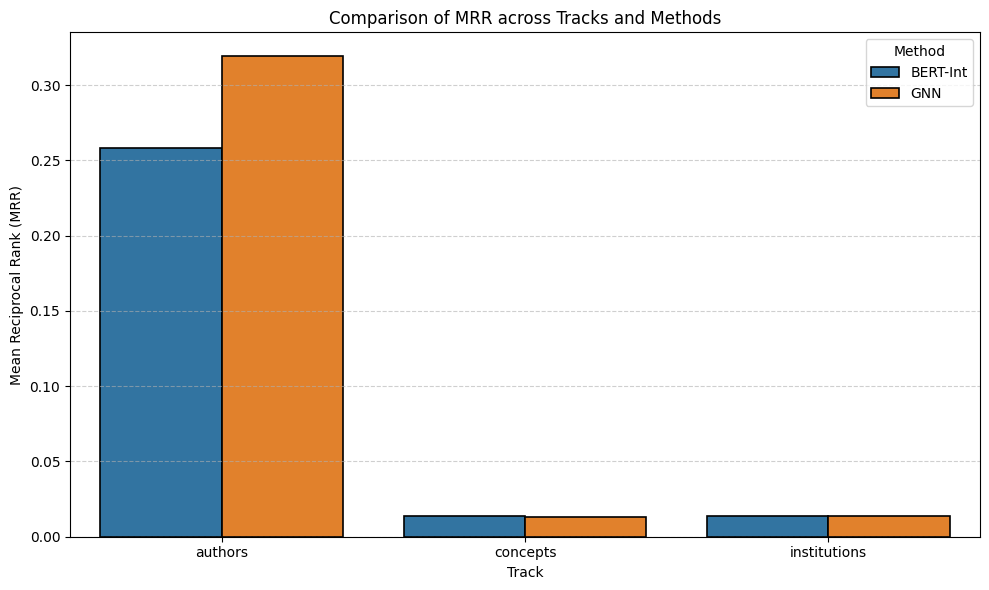

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_best,          # ← use df_best here
    x="Track", y="MRR", hue="Method",
    edgecolor="black", linewidth=1.2
)
plt.title("Comparison of MRR across Tracks and Methods")
plt.ylabel("Mean Reciprocal Rank (MRR)")
plt.xlabel("Track")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Now, to export merged SOA↔YAGO graphs (per track) so you can inspect/visualize them later.

In [19]:
# ============== EXPORT THE GRAPH ==============

# --- reuse your existing helpers / TRACKS / loaders ---

def build_merged_triples_for_track(track_name, rel_same="aligned_with"):
    C = TRACKS[track_name]
    triples_soa  = load_triples_from_edge_csv(C["soa_triples_path"],  C["soa_head"], C["soa_tail"], C["soa_rel"])
    triples_yago = load_triples_from_edge_csv(C["yago_triples_path"], C["yago_head"], C["yago_tail"], C["yago_rel"])
    train_links = load_links_from_csv(C["train_path"], C["gold_src"], C["gold_tgt"])
    valid_links = load_links_from_csv(C["valid_path"], C["gold_src"], C["gold_tgt"])
    test_links  = load_links_from_csv(C["test_path"],  C["gold_src"], C["gold_tgt"])

    merged_train = make_merged_triples(triples_soa, triples_yago, train_links, rel_same=rel_same)
    ensure_eval_entities_present(merged_train, valid_links, test_links)

    # keep eval links separate if you want to export them too
    valid_triples = build_eval_triples(valid_links, rel=rel_same)
    test_triples  = build_eval_triples(test_links,  rel=rel_same)

    return merged_train, valid_triples, test_triples

def triples_to_multidigraph(triples, track_name):
    G = nx.MultiDiGraph(name=f"{track_name}_merged")
    # add edges with relation as key / attribute
    for h, r, t in triples:
        # annotate node types
        if not G.has_node(h):
            G.add_node(h,
                       source=("SOA" if h.startswith("SOA::") else "YAGO" if h.startswith("YAGO::") else "UNK"),
                       track=track_name)
        if not G.has_node(t):
            G.add_node(t,
                       source=("SOA" if t.startswith("SOA::") else "YAGO" if t.startswith("YAGO::") else "UNK"),
                       track=track_name)
        # add edge with rel as 'relation' attribute; also use rel as the MultiDiGraph key
        G.add_edge(h, t, key=r, relation=r)
    return G

def export_graph_files(G, out_dir, base_name):
    os.makedirs(out_dir, exist_ok=True)

    # 1) Edge list CSV (source, relation, target)
    edges_csv = os.path.join(out_dir, f"{base_name}.edges.csv")
    with open(edges_csv, "w", encoding="utf-8") as f:
        f.write("source,relation,target\n")
        for u, v, k, d in G.edges(keys=True, data=True):
            f.write(f"{u},{d.get('relation',k)},{v}\n")

    # 2) Node CSV (id, source-tag, track)
    nodes_csv = os.path.join(out_dir, f"{base_name}.nodes.csv")
    with open(nodes_csv, "w", encoding="utf-8") as f:
        f.write("id,source,track\n")
        for n, d in G.nodes(data=True):
            f.write(f"{n},{d.get('source','')},{d.get('track','')}\n")

    # 3) GEXF (Gephi friendly)
    gexf_path = os.path.join(out_dir, f"{base_name}.gexf")
    nx.write_gexf(G, gexf_path)

    # 4) GraphML (Cytoscape friendly)
    graphml_path = os.path.join(out_dir, f"{base_name}.graphml")
    nx.write_graphml(G, graphml_path)

    return {
        "edges_csv": edges_csv,
        "nodes_csv": nodes_csv,
        "gexf": gexf_path,
        "graphml": graphml_path,
    }

def quick_graph_stats(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    src_counts = Counter(nx.get_node_attributes(G, "source").values())
    rel_counts = Counter([d.get("relation") for _,_,d in G.edges(data=True)])
    print(f"Nodes: {n:,} | Edges: {m:,}")
    print(f"Nodes by source: {dict(src_counts)}")
    print("Top relations:", rel_counts.most_common(5))

def sample_and_draw(G, max_nodes=300, seed=42):
    """Small preview plot so you can see something without rendering the whole graph."""
    random.seed(seed)
    nodes = list(G.nodes())
    keep = set(random.sample(nodes, min(len(nodes), max_nodes)))
    S = G.subgraph(keep).copy()
    # simple layout (small graphs only)
    pos = nx.spring_layout(S, seed=seed, k=0.3)
    colors = ["#e74c3c" if S.nodes[n]["source"]=="SOA" else "#3498db" for n in S.nodes()]
    plt.figure(figsize=(8,8))
    nx.draw_networkx_nodes(S, pos, node_size=30, node_color=colors, alpha=0.8)
    nx.draw_networkx_edges(S, pos, width=0.5, alpha=0.2, arrows=False)
    plt.axis("off")
    plt.title(f"Sampled subgraph ({len(S)} nodes)")
    plt.show()

# ---------- Run for one or all tracks ----------
def build_and_export_track_graph(track_name, base_export_dir=None):
    base_export_dir = base_export_dir or os.path.join(BASE, "graphs", track_name)
    merged_train, valid_triples, test_triples = build_merged_triples_for_track(track_name)

    # --- 🔹 Restrict nodes to gold alignment entities only ---
    gold_entities = set()
    for linkset in [valid_triples, test_triples]:
        for h, r, t in linkset:
            gold_entities.add(h)
            gold_entities.add(t)
    # keep only triples where both head and tail are gold entities
    restricted_triples = [(h, r, t) for (h, r, t) in (merged_train + valid_triples + test_triples)
                          if h in gold_entities and t in gold_entities]

    # --- continue as before ---
    G = triples_to_multidigraph(restricted_triples, track_name)
    quick_graph_stats(G)
    paths = export_graph_files(G, base_export_dir, base_name=f"{track_name}_merged_restricted")
    print("Wrote restricted graph:")
    for k, v in paths.items():
        print(f"  {k}: {v}")

    # optional preview
    # sample_and_draw(G, max_nodes=300)
    return G, paths


# Example: export all three
for t in ["concepts","institutions","authors"]:
    print(f"\n=== Exporting graph for {t} ===")
    _G, _paths = build_and_export_track_graph(t)


=== Exporting graph for concepts ===
Nodes: 1,972 | Edges: 2,002
Nodes by source: {'SOA': 1001, 'YAGO': 971}
Top relations: [('aligned_with', 2002)]
Wrote restricted graph:
  edges_csv: Extracted data\graphs\concepts\concepts_merged_restricted.edges.csv
  nodes_csv: Extracted data\graphs\concepts\concepts_merged_restricted.nodes.csv
  gexf: Extracted data\graphs\concepts\concepts_merged_restricted.gexf
  graphml: Extracted data\graphs\concepts\concepts_merged_restricted.graphml

=== Exporting graph for institutions ===
Nodes: 1,374 | Edges: 2,050
Nodes by source: {'YAGO': 687, 'SOA': 687}
Top relations: [('aligned_with', 1374), ('__present__', 676)]
Wrote restricted graph:
  edges_csv: Extracted data\graphs\institutions\institutions_merged_restricted.edges.csv
  nodes_csv: Extracted data\graphs\institutions\institutions_merged_restricted.nodes.csv
  gexf: Extracted data\graphs\institutions\institutions_merged_restricted.gexf
  graphml: Extracted data\graphs\institutions\institutions_m

Now, let's take the exported alignment graphs and builds an interactive HTML visualization showing only the “aligned_with” edges, that is, the actual SOA ↔ YAGO matches.

In [38]:
def visualize_alignments(graphml_file, out_file):
    G = nx.read_graphml(graphml_file)
    align_edges = [(u,v,d) for u,v,d in G.edges(data=True) if d.get("relation") == "aligned_with"]
    
    H = nx.Graph()
    for u,v,d in align_edges:
        H.add_node(u, source=G.nodes[u].get("source","?"))
        H.add_node(v, source=G.nodes[v].get("source","?"))
        H.add_edge(u,v, relation="aligned_with")

    net = Network(height="1000px", width="100%", bgcolor="#111111", font_color="white", directed=False)
    net.toggle_physics(True)
    net.force_atlas_2based(gravity=-50)  # better spacing
    
    for n, d in H.nodes(data=True):
        src = d["source"]
        color = "#E67E22" if src == "SOA" else "#1ABC9C" if src == "YAGO" else "#95A5A6"
        net.add_node(
            n,
            label=n.split("::")[-1],  # cleaner label
            title=f"{src} entity: {n}",
            color=color,
            size=10
        )
    for u, v, d in H.edges(data=True):
        net.add_edge(u, v, color="#CCCCCC", title="aligned_with")

    net.show_buttons(filter_=['physics'])
    net.write_html(out_file)
    print(f"Exported {len(H.nodes())} nodes, {len(H.edges())} alignment edges → {out_file}")


# Run for all three tracks
visualize_alignments("Extracted data/graphs/concepts/concepts_merged_full.graphml",
                     out_file="concepts_alignment_map.html")

visualize_alignments("Extracted data/graphs/institutions/institutions_merged_full.graphml",
                     out_file="institutions_alignment_map.html")

visualize_alignments("Extracted data/graphs/authors/authors_merged_full.graphml",
                     out_file="authors_alignment_map.html")

Exported 2000 nodes, 6 edges → concepts_full_map.html
Exported 2000 nodes, 8 edges → institutions_full_map.html
Exported 2000 nodes, 11 edges → authors_full_map.html


Now, let's create an interactive visual map of our merged knowledge graph (SemOpenAlex + YAGO) that includes both the alignment links (aligned_with) and a random sample of other internal edges to show local graph structure.

First we load the full .graphml file, separates the cross-graph alignment edges from all other relations, and then keep all alignment links plus a random subset of other connections (up to a user-defined max_edges, e.g. 1000) to avoid overloading the visualization. It then builds a smaller subgraph and uses PyVis to render it interactively:

Red nodes represent SOA entities, blue nodes represent YAGO ones.

Green edges are alignment links, and gray edges are regular relations.

Finally, it exports this as an HTML file.

In [20]:

def visualize_graph_with_alignment(graphml_file, out_file, max_edges=1000):
    # Load graph
    G = nx.read_graphml(graphml_file)
    print(f"Loaded graph with {len(G.nodes())} nodes, {len(G.edges())} edges")

    # Separate aligned_with edges (cross-KG) and others
    align_edges = [(u,v,d) for u,v,d in G.edges(data=True) if d.get("relation") == "aligned_with"]
    other_edges = [(u,v,d) for u,v,d in G.edges(data=True) if d.get("relation") != "aligned_with"]

    # Always include all aligned_with edges
    edges_to_keep = align_edges.copy()

    # Compute how many more edges we can take
    remaining_capacity = max_edges - len(edges_to_keep)

    if remaining_capacity > 0:
        if len(other_edges) > remaining_capacity:
            edges_to_keep += random.sample(other_edges, remaining_capacity)
        else:
            edges_to_keep += other_edges

    # Build subgraph
    H = nx.Graph()
    for u,v,d in edges_to_keep:
        H.add_node(u, source=G.nodes[u].get("source","?"))
        H.add_node(v, source=G.nodes[v].get("source","?"))
        H.add_edge(u,v, relation=d.get("relation",""))

    # PyVis interactive visualization
    net = Network(height="800px", width="100%", bgcolor="#222222", font_color="white", directed=False)

    for n,d in H.nodes(data=True):
        src = d["source"]
        color = "red" if d["source"]=="SOA" else "blue"
        net.add_node(n,
        label=n.split("::")[-1],  # shorter label for readability
        title=f"{src} | Degree: {H.degree(n)}",  # 👈 added tooltip info
        color=color,
        size=10)

    for u,v,d in H.edges(data=True):
        edge_color = "green" if d.get("relation")=="aligned_with" else "gray"
        net.add_edge(u, v, label=d.get("relation",""), color=edge_color)

    # Save HTML
    net.write_html(out_file)
    print(f"Exported {len(H.nodes())} nodes, {len(H.edges())} edges → {out_file}")

# Run for all three tracks
visualize_graph_with_alignment("Extracted data/graphs/concepts/concepts_merged_full.graphml",
                out_file="concepts_full_map.html")

visualize_graph_with_alignment("Extracted data/graphs/institutions/institutions_merged_full.graphml",
                out_file="institutions_full_map.html")

visualize_graph_with_alignment("Extracted data/graphs/authors/authors_merged_full.graphml",
                out_file="authors_full_map.html")

Loaded graph with 265474 nodes, 135649 edges
Exported 2460 nodes, 1251 edges → concepts_full_map.html
Loaded graph with 243810 nodes, 123875 edges
Exported 1715 nodes, 858 edges → institutions_full_map.html
Loaded graph with 314907 nodes, 200054 edges
Exported 1944 nodes, 985 edges → authors_full_map.html


In [22]:
# let's open all of these in the browser
# NOTE: it will take some time to load these in the browser like 5 to 10 mins) 
webbrowser.open_new_tab("concepts_full_map.html")
webbrowser.open_new_tab("institutions_full_map.html")
webbrowser.open_new_tab("authors_full_map.html")

True

# **Future Roadmap**

* **Re-run the pipeline including new entity types**  
  Add geo/places (cities, countries) and extend SPARQL queries for geographic info (coordinates, countries).  
  Optionally include venues/sources and events/conferences.

* **Merge results into a single integrated Knowledge Graph (KG)**  
  Combine all tracks (authors, institutions, concepts, places, etc.) into one unified graph.

* **Perform Link Prediction / Graph Completion**  
  Use the trained embeddings to infer missing cross-graph links or new entity alignments.

* **Export and Query the KG**  
  Export the final graph to RDF/Turtle format and load it into a SPARQL store (e.g., RDFLib + Fuseki).
